__[NOTE: This is a work in progress shared for better collaboration.]__

For a summary of this in Persian, see [this thread](https://twitter.com/BashirSadjad/status/1591752026610102272),or [the unrolled version](https://threadreaderapp.com/thread/1591752026610102272.html).
# What is this?

This is a notebook for analyzing official numbers of registered deaths 
around November 2019 in Iran. The core question is how much of the
significant excess rate (compared to previous years or months before/after) 
is possibly due to the brutal crackdown of protests in "Bloody November"?
And how much might be due to other causes.

## Background and context

The [Bloody November](https://en.wikipedia.org/wiki/2019%E2%80%932020_Iranian_protests) (in Persian آبان خونین), refers to a 
series of protests that were sparked after the price of fuel was tripled
suddenly on 15 November 2019. During a few days of widespread protests, the
Iranian security forces used live ammunition to kill hundreds or maybe more than a thousand of protesters. Amnesty International has identified at least
[321 deaths](https://www.amnesty.org/en/documents/mde13/2308/2020/en/),
in a series of reports that were updated during the two years after that bloody event (gradually identifying more victims).

In December 2019, [Reuters reported](https://www.reuters.com/article/us-iran-protests-specialreport/special-report-irans-leader-ordered-crackdown-on-unrest-do-whatever-it-takes-to-end-it-idUSKBN1YR0QR)
that as many as 1500 people were killed when the supreme leader,
Ali Khamenei, ordered the security apparatus to
_"do whatever it takes to end it"_. Reuters declared
_"three Iranian interior ministry officials"_ as the source for this number; it also said that this figure includes members of security forces
too. US government's [estimate](https://www.nbcnews.com/news/world/u-s-says-iran-may-have-killed-1-000-protesters-n1096666)
is that more than 1000 protesters were murdered.

Official seasonal mortality rate statistics that were first examined to
determine the real impact of COVID-19 in Iran, revealed that Fall 2019
has had an unusually higher death rate compared to previous years (e.g.,
[here](https://kavehmadani.medium.com/in-search-of-the-murder-making-sense-of-irans-reported-deaths-4279d2b03175)
is a report of 9488 extra deaths compared to Fall 2018).
Later analysis for monthly mortality stats, revealed that Aban 1398
(23 Oct. 2019 to 22 Nov. 2019) had over 4000 extra deaths compared to
the months before and after it and more than 6000 extra deaths compare
to the same period of the previous year
([source](https://www.radiofarda.com/a/commentary-on-death-toll-report-of-november-2019/31276714.html)).

In this notebook we look at the weekly mortality stats that were released
a while ago (I think, sometime in Summer 2021). The main goal here is to
collect various pieces of evidence available in one place to make it
easier for others to conduct more investigations.
Obviously, in a normal society, the exact number of victims of police
brutallity should be announced by official authorities and each case
fully investigated. In the absence of such investigations, we are
left with whatever is available to us to shed some light on the possible
extent of this massacre and to seek some explanation and accountability.

## The structure of this "notebook"
The main data is the weekly death stats released by National Organization 
for Civil Registration (NOCR) available [here](https://www.sabteahval.ir/Page.aspx?mId=49826&ID=3273&Page=Magazines/SquareshowMagazine), plus
some othre related data linked throughout the notebook.
Each section looks at the data from a different angle, e.g., some sanity
checks, plotting and comparing with previous years, looking at the
distribution of location, age and cause of death, comparison with
Canada trends, etc.

One may question the authenticity of NOCR's data, especially when it comes
to age, location, and cause of death data; but our approach here is to
treat the data as authentic to see what else can be inferred from it.
This is clearly a work in progress and by no means a thorough analysis.
A lot of further statiscial analysis can be done on this (e.g.,
some ARIMA modeling); and BTW I am not a statistician!
These are all to say that forking this work and more contributions are welcome.

Finally, a lot of data processing scripts below
can be improved for better readability, performance, etc.; optimizing
those aspects has not been the goal. The runtime environment is
[Google Colab](https://colab.research.google.com/).

Bashir Sadjad, Winter 2021 (1400)

[minor updates Nov. 2022; Aban 1401].

In [1]:
import io
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Loading data
The raw data is from NOCR as mentioned above. It is also available in
[this Google Drive folder](https://drive.google.com/drive/folders/1ZNEHADgJ-qIK0PqWZD9icC_yv3ST3GPk?usp=sharing).

In [2]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving weekly-death-by-province-age-group-and-sex-1399.xlsx to weekly-death-by-province-age-group-and-sex-1399.xlsx
Saving weekly-death-by-province-age-group-and-sex-1398.xlsx to weekly-death-by-province-age-group-and-sex-1398.xlsx
Saving weekly-death-by-province-age-group-and-sex-1397.xlsx to weekly-death-by-province-age-group-and-sex-1397.xlsx
Saving weekly-death-by-province-age-group-and-sex-1396.xlsx to weekly-death-by-province-age-group-and-sex-1396.xlsx
Saving weekly-death-by-province-age-group-and-sex-1395.xlsx to weekly-death-by-province-age-group-and-sex-1395.xlsx
User uploaded file "weekly-death-by-province-age-group-and-sex-1399.xlsx" with length 5011490 bytes
User uploaded file "weekly-death-by-province-age-group-and-sex-1398.xlsx" with length 5282298 bytes
User uploaded file "weekly-death-by-province-age-group-and-sex-1397.xlsx" with length 4867297 bytes
User uploaded file "weekly-death-by-province-age-group-and-sex-1396.xlsx" with length 2574920 bytes
User uploaded file "

In [3]:
file_io = {}
file_io[1395] = io.BytesIO(uploaded.get('weekly-death-by-province-age-group-and-sex-1395.xlsx'))
file_io[1396] = io.BytesIO(uploaded.get('weekly-death-by-province-age-group-and-sex-1396.xlsx'))
file_io[1397] = io.BytesIO(uploaded.get('weekly-death-by-province-age-group-and-sex-1397.xlsx'))
file_io[1398] = io.BytesIO(uploaded.get('weekly-death-by-province-age-group-and-sex-1398.xlsx'))
file_io[1399] = io.BytesIO(uploaded.get('weekly-death-by-province-age-group-and-sex-1399.xlsx'))

In [4]:
data_1395 = pd.read_excel(file_io[1395], sheet_name='Data', header=2)

In [5]:
data_1395.head(5)

,سال,شماره هفته,کد استان,استان,جنسیت,سن,تعداد مرگ (ثبت شده),Unnamed: 7
0,1395,D95W44[951025-951101],P0001,آذربايجان شرقي,زن,0,5,NaN
1,1395,D95W44[951025-951101],P0001,آذربايجان شرقي,زن,1-4,4,NaN
2,1395,D95W44[951025-951101],P0001,آذربايجان شرقي,زن,5-9,2,NaN
3,1395,D95W44[951025-951101],P0001,آذربايجان شرقي,زن,10-14,1,NaN
4,1395,D95W44[951025-951101],P0001,آذربايجان شرقي,زن,15-19,4,NaN


In [6]:
# Load all and change header names to make it easier to work with data
data = {}
for year in file_io:
  data[year] = pd.read_excel(
      file_io[year], sheet_name='Data', header=None, skiprows=3, usecols=[0, 1, 2, 3, 4, 5, 6],
      names=['year', 'week', 'province_code', 'province', 'sex', 'age', 'num_deaths'])
  data[year]['week_id'] = data[year]['week'].str.replace(
      'D' + str(year - 1300), '').str.replace('\[.*', '')  
data[1395].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


,year,week,province_code,province,sex,age,num_deaths,week_id
0,1395,D95W44[951025-951101],P0001,آذربايجان شرقي,زن,0,5,W44
1,1395,D95W44[951025-951101],P0001,آذربايجان شرقي,زن,1-4,4,W44
2,1395,D95W44[951025-951101],P0001,آذربايجان شرقي,زن,5-9,2,W44
3,1395,D95W44[951025-951101],P0001,آذربايجان شرقي,زن,10-14,1,W44
4,1395,D95W44[951025-951101],P0001,آذربايجان شرقي,زن,15-19,4,W44


# Doing some sanity-checks and aggregation

In [7]:
# Doing some minimal sanity-checks; the extra number of rows
# for 1396 is because there are 53 weeks (as we will see later).
for year in data:
  print('Num rows for year {} = {} total deaths = {}'.format(
      year, data[year].index.size, data[year]['num_deaths'].sum()))

Num rows for year 1395 = 67704 total deaths = 359549
Num rows for year 1396 = 69006 total deaths = 372690
Num rows for year 1397 = 67704 total deaths = 371892
Num rows for year 1398 = 67704 total deaths = 391378
Num rows for year 1399 = 67704 total deaths = 507511


In [9]:
week_agg = {}
for year in data:
  week_agg[year] = data[year].groupby(by=['year', 'week', 'week_id'], as_index=False).sum()
week_agg[1398].head(5)

,year,week,week_id,num_deaths
0,1398,D98W01[980103-980109],W01,7467
1,1398,D98W02[980110-980116],W02,4692
2,1398,D98W03[980117-980123],W03,9236
3,1398,D98W04[980124-980130],W04,6918
4,1398,D98W05[980131-980206],W05,6963


In [10]:
for year in week_agg:
  print('Number of weeks for year {} = {}'.format(year, len(week_agg[year])))

Number of weeks for year 1395 = 52
Number of weeks for year 1396 = 53
Number of weeks for year 1397 = 52
Number of weeks for year 1398 = 52
Number of weeks for year 1399 = 52


## First and last weeks might be incomplete weeks

In [11]:
week_agg[1396].head(2)

,year,week,week_id,num_deaths
0,1396,D96W01[951228-960104],W01,3102
1,1396,D96W02[960105-960111],W02,9739


In [12]:
week_agg[1396].tail(2)

,year,week,week_id,num_deaths
51,1396,D96W52[961219-961225],W52,7159
52,1396,D96W53[961226-970103],W53,5228


In [13]:
# Noting incomplete weeks:
for year in week_agg:
  print(week_agg[year]['week'].iloc[0])
  print(week_agg[year]['week'].iloc[len(week_agg[year])-1])

D95W01[941229-950106]
D95W52[951221-951227]
D96W01[951228-960104]
D96W53[961226-970103]
D97W01[970104-970110]
D97W52[971225-980102]
D98W01[980103-980109]
D98W52[981224-990101]
D99W01[990102-990108]
D99W52[991223-991229]


In [14]:
incomplete_weeks = {'D95W01[941229-950106]',
                    'D96W01[951228-960104]', 'D96W53[961226-970103]',
                    'D97W52[971225-980102]',
                    'D98W52[981224-990101]',
                    'D99W52[991223-991229]'}

In [ ]:
# Note: I decided to skip this step because it was causing more issues later!
#
# Recalculating weekly aggregates, excluding `dropped_weeks`
#week_agg = {}
#for year in data:
#  week_agg[year] = data[year][~data[year]['week'].isin(incomplete_weeks)].groupby(
#      by=['year', 'week', 'week_id'], as_index=False).sum()
#week_agg[1398].head(5)

# Plots

In selection of dates in this section, note that the Aban protests started on
the night of 24th of Aban (i.e.,15 Nov. 2019). The main events continued for about one week.

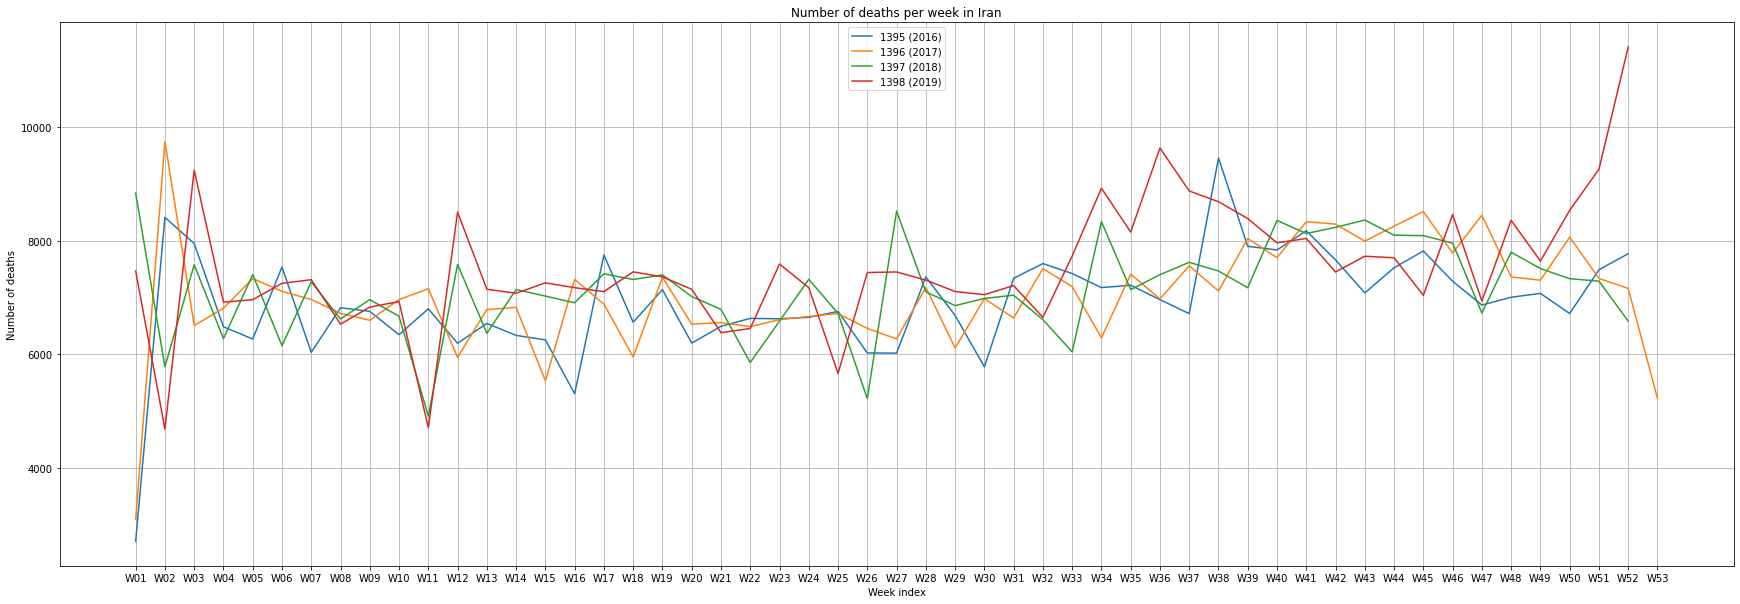

In [15]:
%matplotlib inline
def plot_weeks(week_agg, years, y_col='num_deaths',
               title='Number of deaths per week in Iran'):
  fig = plt.figure(figsize=[30, 10])
  ax = fig.add_subplot()
  ax.set_xlabel('Week index')
  ax.set_ylabel('Number of deaths')
  for y in years:
    ax.plot(week_agg[y]['week_id'].tolist(), week_agg[y][y_col].tolist(),
            label='{} ({})'.format(y, y + 621))
  plt.legend(loc='upper center')
  plt.title(title)
  plt.grid()
  plt.show()

# We will look at 1399 later in the COVID section as the numbers are completely
# distorted due to the outbreak.
plot_weeks(week_agg, [1395, 1396, 1397, 1398])

In [16]:
# We rely more on the rolling average to better see the trends.
rolling_avg = {}
for y in [1395, 1396, 1397, 1398, 1399]:
  rolling_avg[y] = week_agg[y].rolling(4, on='week_id').mean()
rolling_avg[1398].head()

,num_deaths,week_id,year
0,NaN,W01,NaN
1,NaN,W02,NaN
2,NaN,W03,NaN
3,7078.25,W04,1398.0
4,6952.25,W05,1398.0


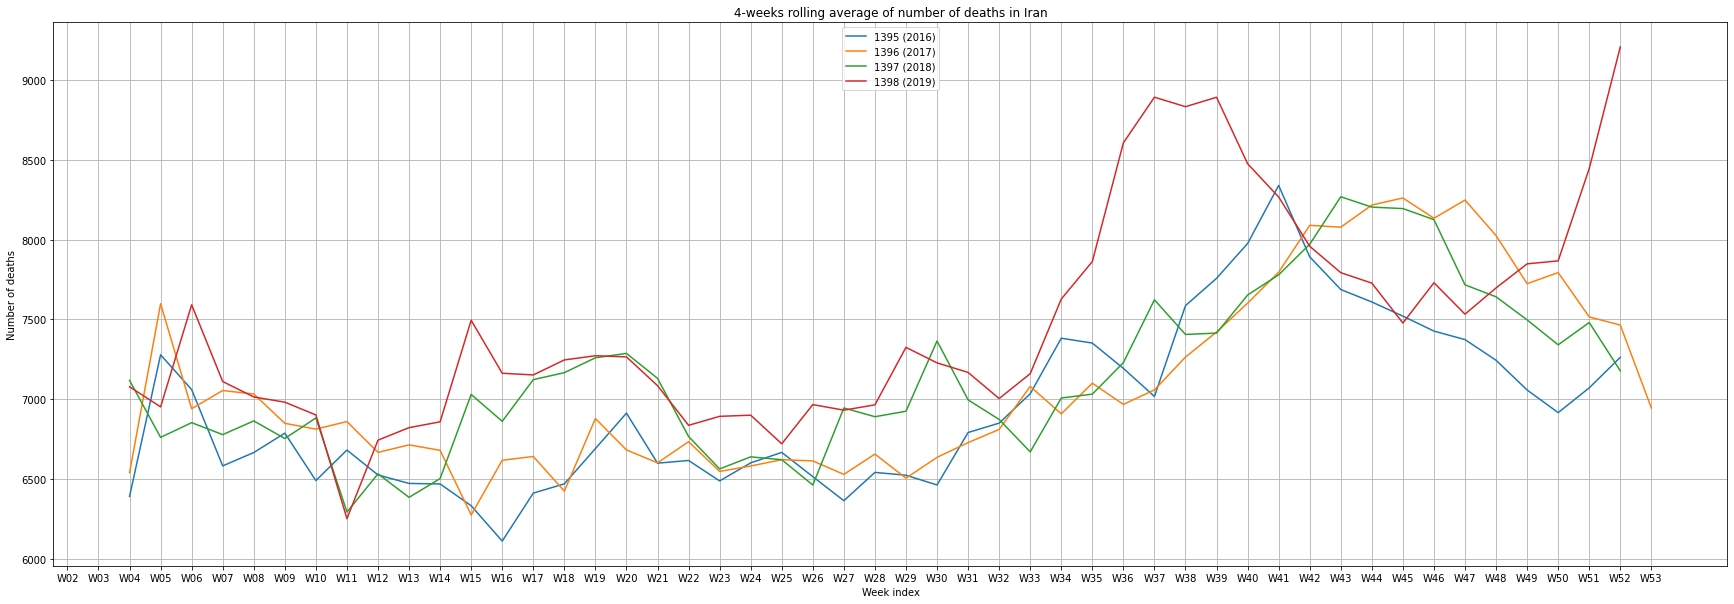

In [17]:
plot_weeks(rolling_avg, [1395, 1396, 1397, 1398],
           title='4-weeks rolling average of number of deaths in Iran')

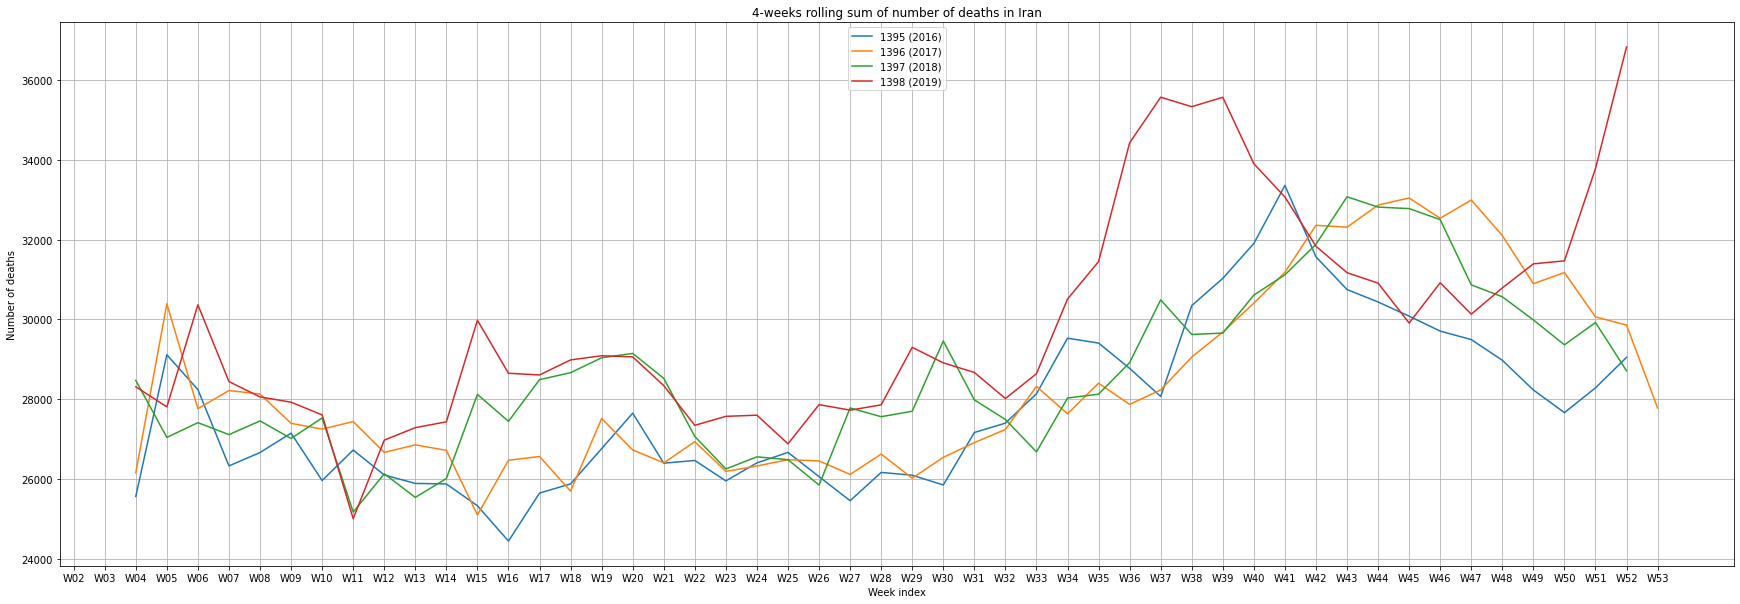

In [18]:
rolling_sum = {}
for y in [1395, 1396, 1397, 1398, 1399]:
  rolling_sum[y] = week_agg[y].rolling(4, on='week_id').sum()
plot_weeks(rolling_sum, [1395, 1396, 1397, 1398],
           title='4-weeks rolling sum of number of deaths in Iran')

## The target weeks
In Fall 1398 (2019) the period that has a significant number of excess
deaths compared to previous years, starts around `W34` and ends around `W39`.
`W34` ends on 24th of Aban, i.e., the day civil unrest started. It is
probably safe to say that `W35` is the first week on which the murdered
protesters are started to be tallied.

**Side note:** There is a possibility that the actual death date is recorded
earlier for security reasons. We know for some victims of Aban protests,
the actual death is recorded over a week _later_ (for some examples see [here](https://twitter.com/1500tasvir/status/1466337404936232962)).
But I have not seen evidences of these being recorded _earlier_.

In [20]:
week_agg[1398][week_agg[1398]['week_id'].isin(['W34', 'W35', 'W36', 'W37', 'W38', 'W39'])]

,year,week,week_id,num_deaths
33,1398,D98W34[980818-980824],W34,8919
34,1398,D98W35[980825-980901],W35,8150
35,1398,D98W36[980902-980908],W36,9625
36,1398,D98W37[980909-980915],W37,8870
37,1398,D98W38[980916-980922],W38,8682
38,1398,D98W39[980923-980929],W39,8386


In [22]:
target_weeks = {'W35', 'W36', 'W37', 'W38'}
pre_target = {'W31', 'W32', 'W33', 'W34'}
post_target = {'W39', 'W40', 'W41', 'W42'}

In [23]:
for y in [1395, 1396, 1397, 1398]:
  print('Year {}, target period deaths= {}'.format(
      y, week_agg[y][week_agg[y]['week_id'].isin(
          target_weeks)]['num_deaths'].sum()))

Year 1395, target period deaths= 30345
Year 1396, target period deaths= 29056
Year 1397, target period deaths= 29623
Year 1398, target period deaths= 35327


In [24]:
for y in [1395, 1396, 1397, 1398]:
  print('Year {}, BEFORE target period deaths= {}'.format(
      y, week_agg[y][week_agg[y]['week_id'].isin(
          pre_target)]['num_deaths'].sum()))

Year 1395, BEFORE target period deaths= 29529
Year 1396, BEFORE target period deaths= 27635
Year 1397, BEFORE target period deaths= 28031
Year 1398, BEFORE target period deaths= 30509


In [25]:
for y in [1395, 1396, 1397, 1398]:
  print('Year {}, AFTER target period deaths= {}'.format(
      y, week_agg[y][week_agg[y]['week_id'].isin(
          post_target)]['num_deaths'].sum()))

Year 1395, AFTER target period deaths= 31566
Year 1396, AFTER target period deaths= 32356
Year 1397, AFTER target period deaths= 31882
Year 1398, AFTER target period deaths= 31831


So from this crude analysis, it seems if we compare the month after when Aban
protests started to the same period in previous years, there are more than
5700 extra deaths. We call this the _"target period"_.

The month after this period does not show much difference compared to previous
years. The month right before it, has more deaths though, i.e., over 2100.

# Fall of 1398 (2019)
Here we focus on the 12 weeks period that we looked at above, i.e.,
`W31` to `W42`. This includes the 4 weeks of Aban massacre (_"target period"_)
and 4 weeks before and after that (_"extended target period"_).
This period is most of Fall of 1398 (2019) and early Winter.


## Provinces stats

In [26]:
region_agg = {}
target_data = {}
for y in [1395, 1396, 1397, 1398]:
  target_data[y] = data[y][data[y]['week_id'].isin(target_weeks)].copy()
for y in target_data:
  region_agg[y] = target_data[y].groupby(
      by=['year', 'province', 'province_code'], as_index=False).sum()
region_agg[1398].head(5)

,year,province,province_code,num_deaths
0,1398,آذربايجان شرقي,P0001,2124
1,1398,آذربايجان غربی,P0002,1441
2,1398,اردبیل,P0003,603
3,1398,اصفهان,P0004,2307
4,1398,البرز,P0005,1038


In [27]:
old_target_mean = pd.concat(region_agg[y] for y in [1395, 1396, 1397]).groupby(
    by=['province', 'province_code'], as_index=False).mean()
old_target_mean.head()

,province,province_code,year,num_deaths
0,آذربايجان شرقي,P0001,1396.0,1684.333333
1,آذربايجان غربی,P0002,1396.0,1126.000000
2,اردبیل,P0003,1396.0,537.000000
3,اصفهان,P0004,1396.0,1890.000000
4,البرز,P0005,1396.0,746.666667


In [28]:
joined_with_old_mean = pd.merge(
    region_agg[1398], old_target_mean, on=['province', 'province_code'],
    suffixes=['_1398', '_old_mean'])
joined_with_old_mean.insert(
    0, 'ratio_1398',
    joined_with_old_mean['num_deaths_1398']/joined_with_old_mean['num_deaths_old_mean'])
joined_with_old_mean.head()

,ratio_1398,year_1398,province,province_code,num_deaths_1398,year_old_mean,num_deaths_old_mean
0,1.261033,1398,آذربايجان شرقي,P0001,2124,1396.0,1684.333333
1,1.279751,1398,آذربايجان غربی,P0002,1441,1396.0,1126.000000
2,1.122905,1398,اردبیل,P0003,603,1396.0,537.000000
3,1.220635,1398,اصفهان,P0004,2307,1396.0,1890.000000
4,1.390179,1398,البرز,P0005,1038,1396.0,746.666667


In [29]:
sorted_ratio = joined_with_old_mean.sort_values(by=['ratio_1398'], ascending=False)
sorted_ratio

,ratio_1398,year_1398,province,province_code,num_deaths_1398,year_old_mean,num_deaths_old_mean
12,1.429856,1398,زنجان,P0014,530,1396.0,370.666667
10,1.424272,1398,خراسان شمالی,P0012,489,1396.0,343.333333
4,1.390179,1398,البرز,P0005,1038,1396.0,746.666667
8,1.350754,1398,خراسان جنوبی,P0010,448,1396.0,331.666667
28,1.311024,1398,گلستان,P0024,888,1396.0,677.333333
1,1.279751,1398,آذربايجان غربی,P0002,1441,1396.0,1126.000000
0,1.261033,1398,آذربايجان شرقي,P0001,2124,1396.0,1684.333333
6,1.260234,1398,بوشهر,P0007,431,1396.0,342.000000
5,1.246824,1398,ایلام,P0006,229,1396.0,183.666667
30,1.238508,1398,یزد,P0031,476,1396.0,384.333333


## Zooming on high difference provinces

In [30]:
def province_rolling_mean(province):
  rolling_mean = {}
  for y in [1395, 1396, 1397, 1398]:
    rolling_mean[y] = data[y][data[y]['province'] == province].copy().groupby(
        by=['year', 'week', 'week_id'], as_index=False).sum().rolling(
            4, on='week_id').mean()
  return rolling_mean

### Zanjan

In [31]:
zanjan_rolling = province_rolling_mean('زنجان')
zanjan_rolling[1398].head()

,num_deaths,week_id,year
0,NaN,W01,NaN
1,NaN,W02,NaN
2,NaN,W03,NaN
3,100.75,W04,1398.0
4,94.75,W05,1398.0


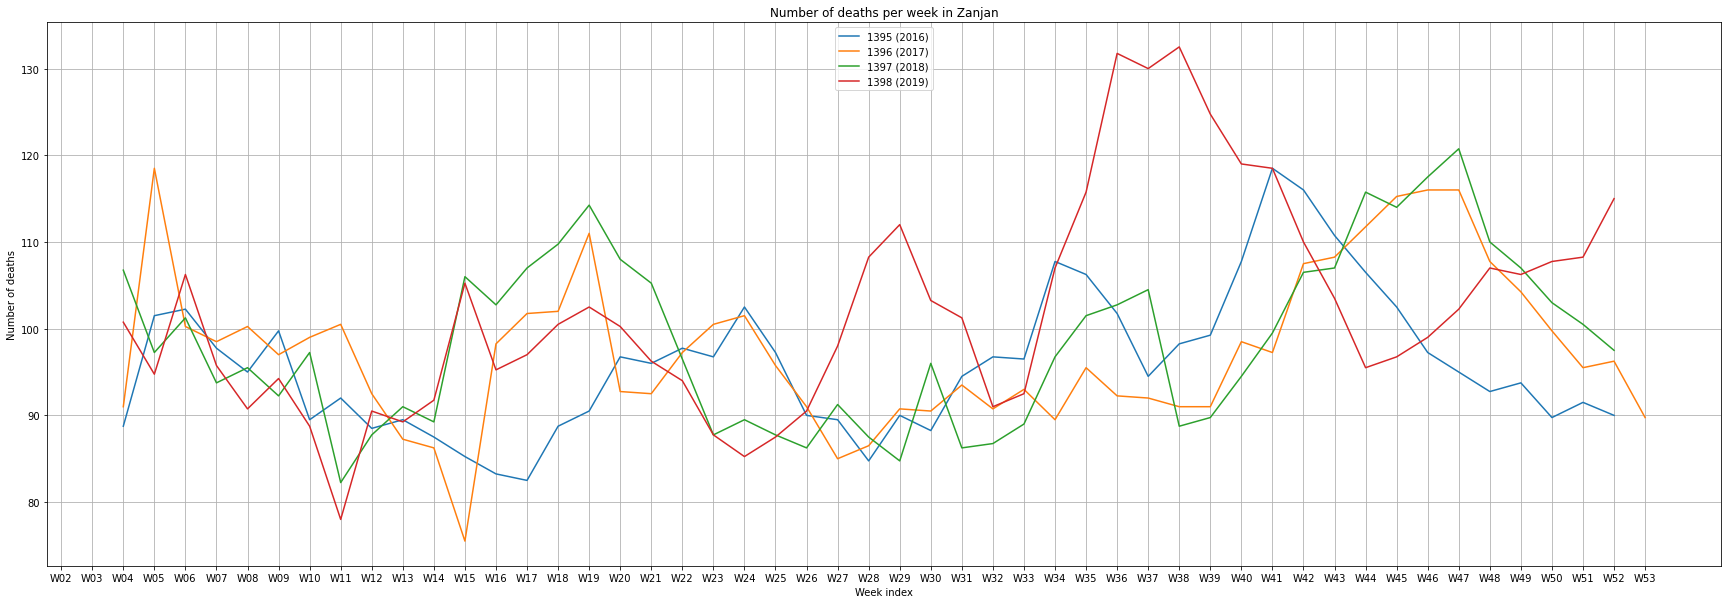

In [32]:
plot_weeks(zanjan_rolling, [1395, 1396, 1397, 1398],
           title='Number of deaths per week in Zanjan')

### Alborz

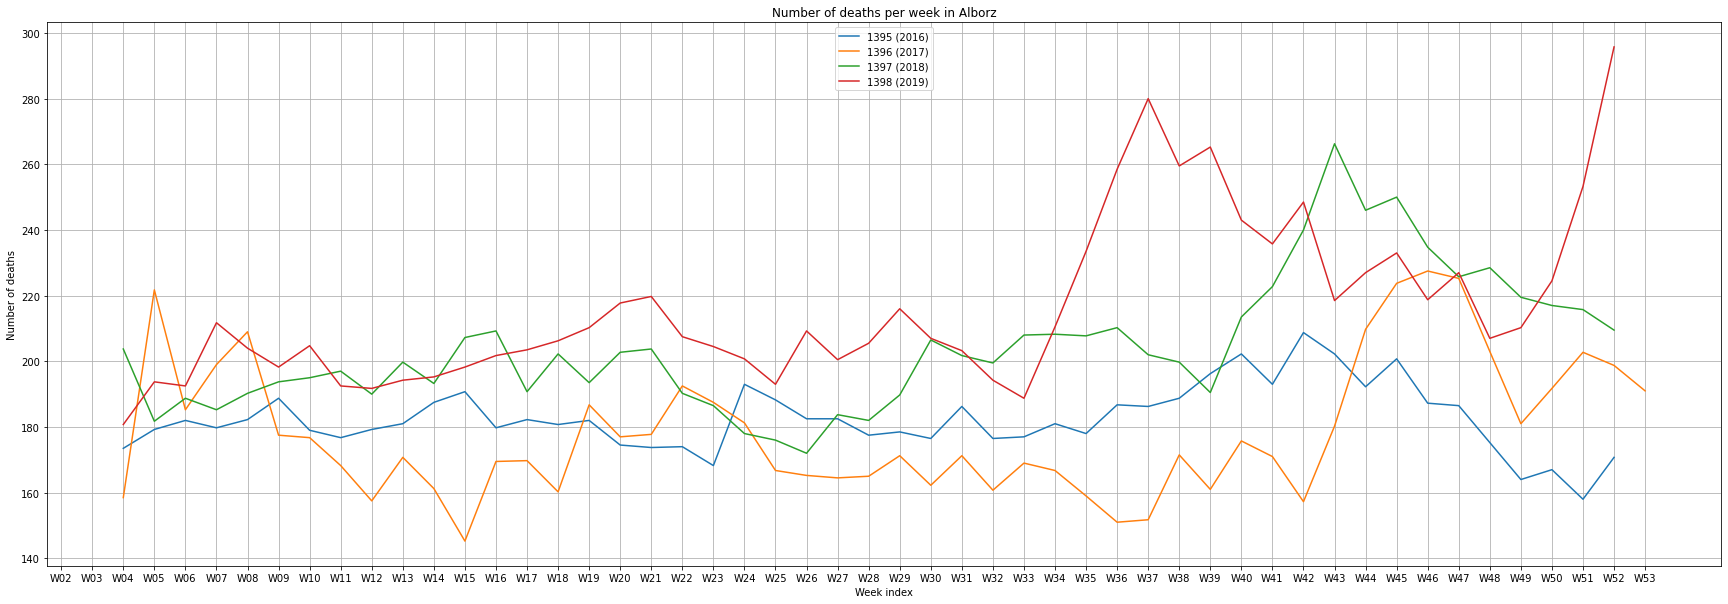

In [33]:
alborz_rolling = province_rolling_mean('البرز')
plot_weeks(alborz_rolling, [1395, 1396, 1397, 1398],
           title='Number of deaths per week in Alborz')

### East Azerbaijan

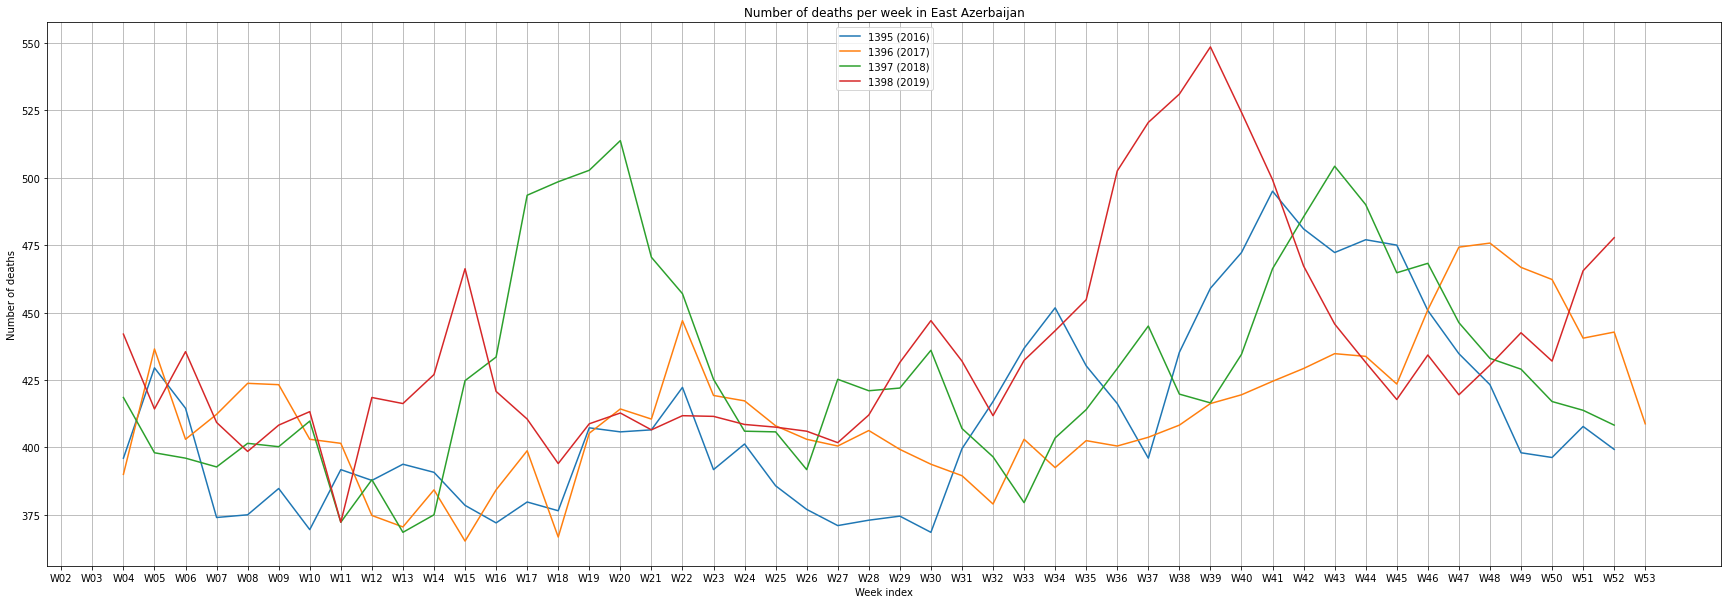

In [ ]:
east_az_rolling = province_rolling_mean('آذربايجان شرقي')
plot_weeks(east_az_rolling, [1395, 1396, 1397, 1398],
           title='Number of deaths per week in East Azerbaijan')

### Esfahan

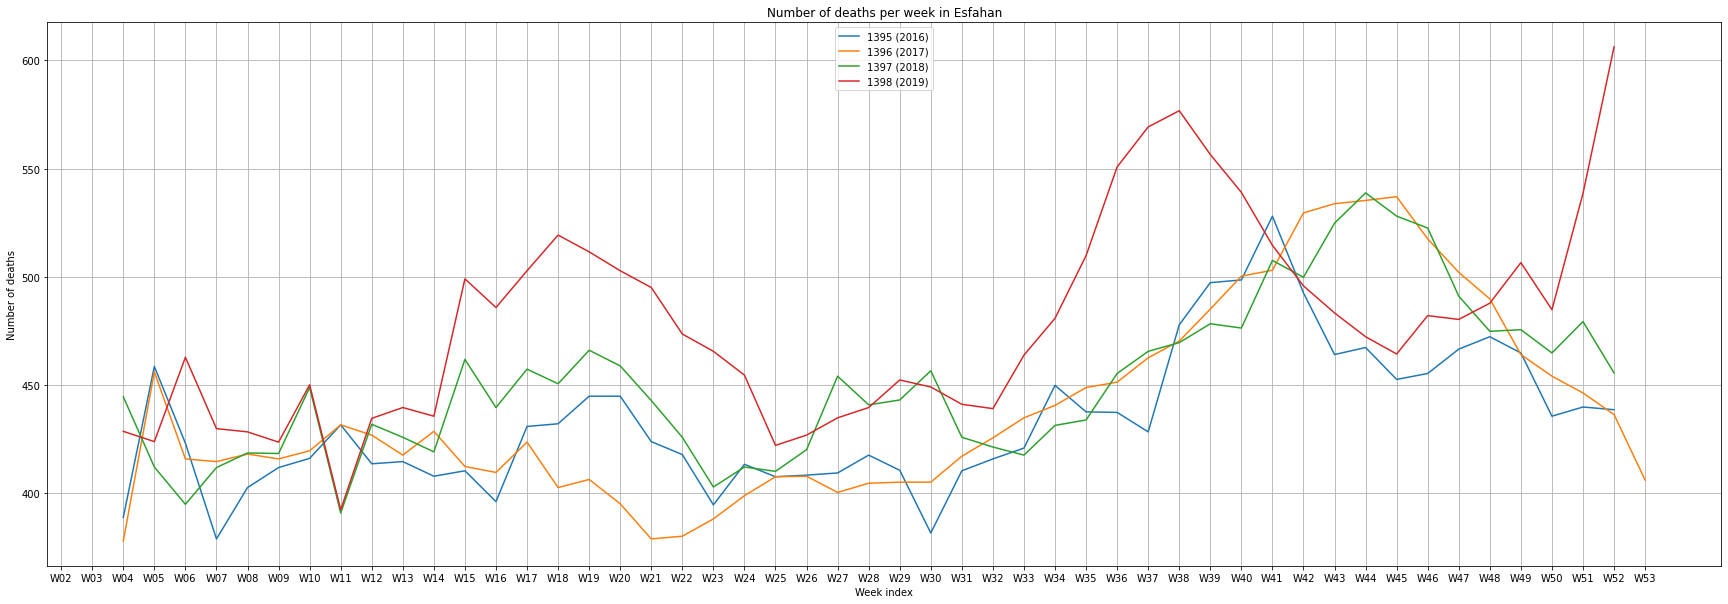

In [ ]:
esfahan_rolling = province_rolling_mean('اصفهان')
plot_weeks(esfahan_rolling, [1395, 1396, 1397, 1398],
           title='Number of deaths per week in Esfahan')

### Tehran

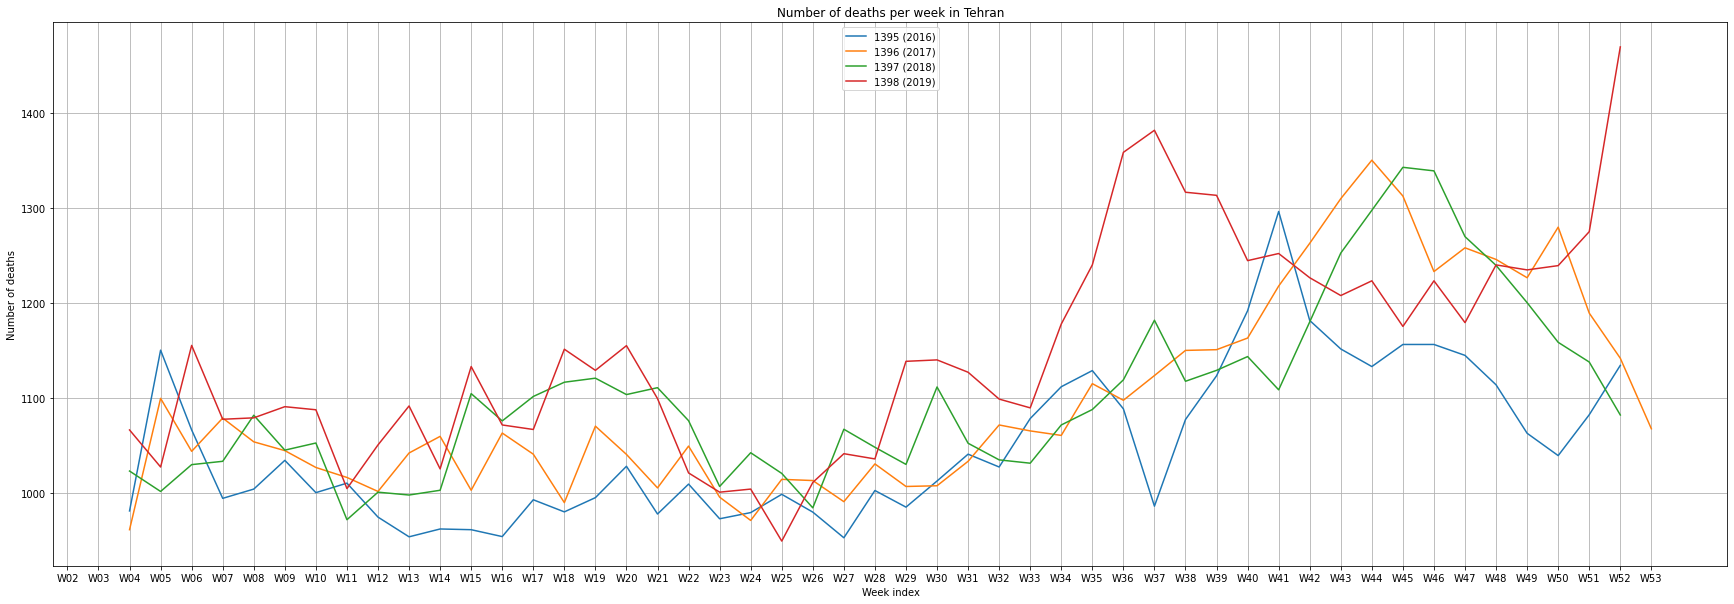

In [34]:
tehran_rolling = province_rolling_mean('تهران')
plot_weeks(tehran_rolling, [1395, 1396, 1397, 1398],
           title='Number of deaths per week in Tehran')

### Kordestan

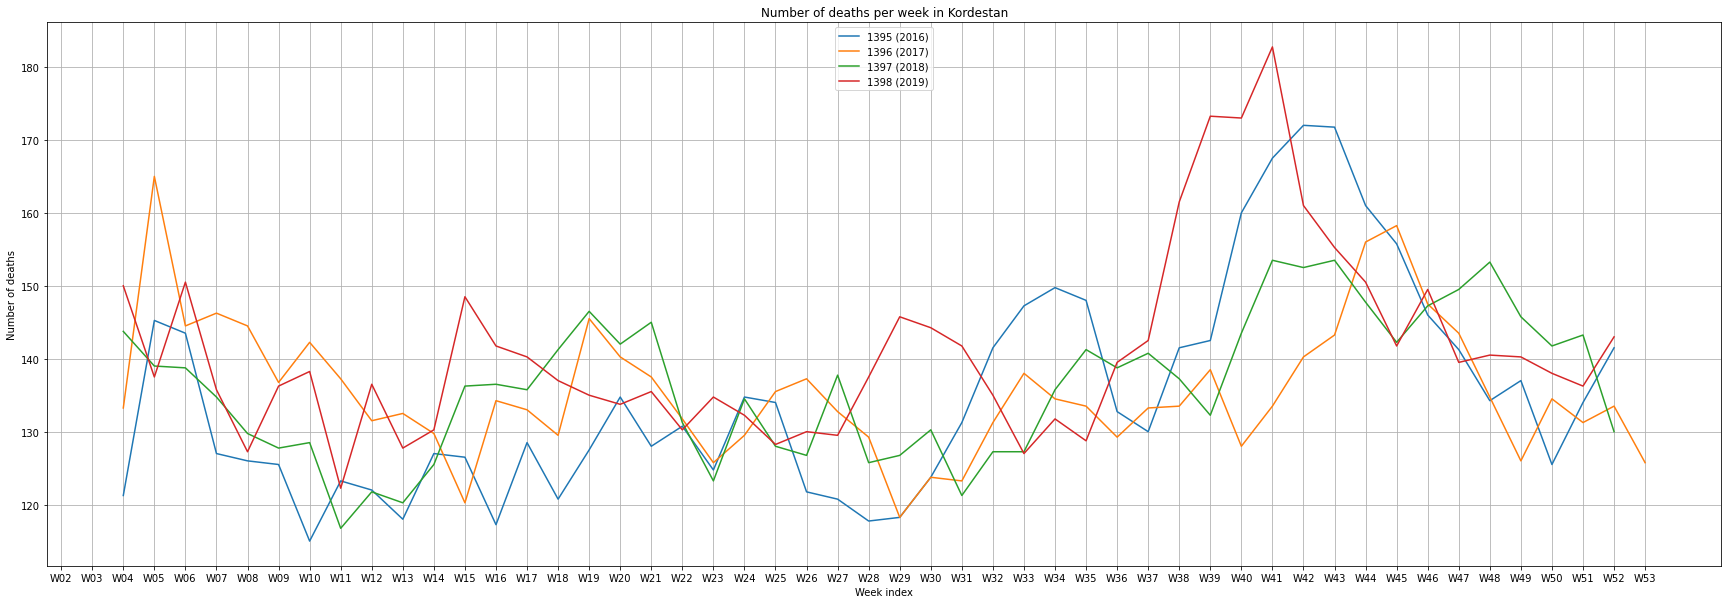

In [ ]:
kordestan_rolling = province_rolling_mean('کردستان')
plot_weeks(kordestan_rolling, [1395, 1396, 1397, 1398],
           title='Number of deaths per week in Kordestan')

### Khuzestan

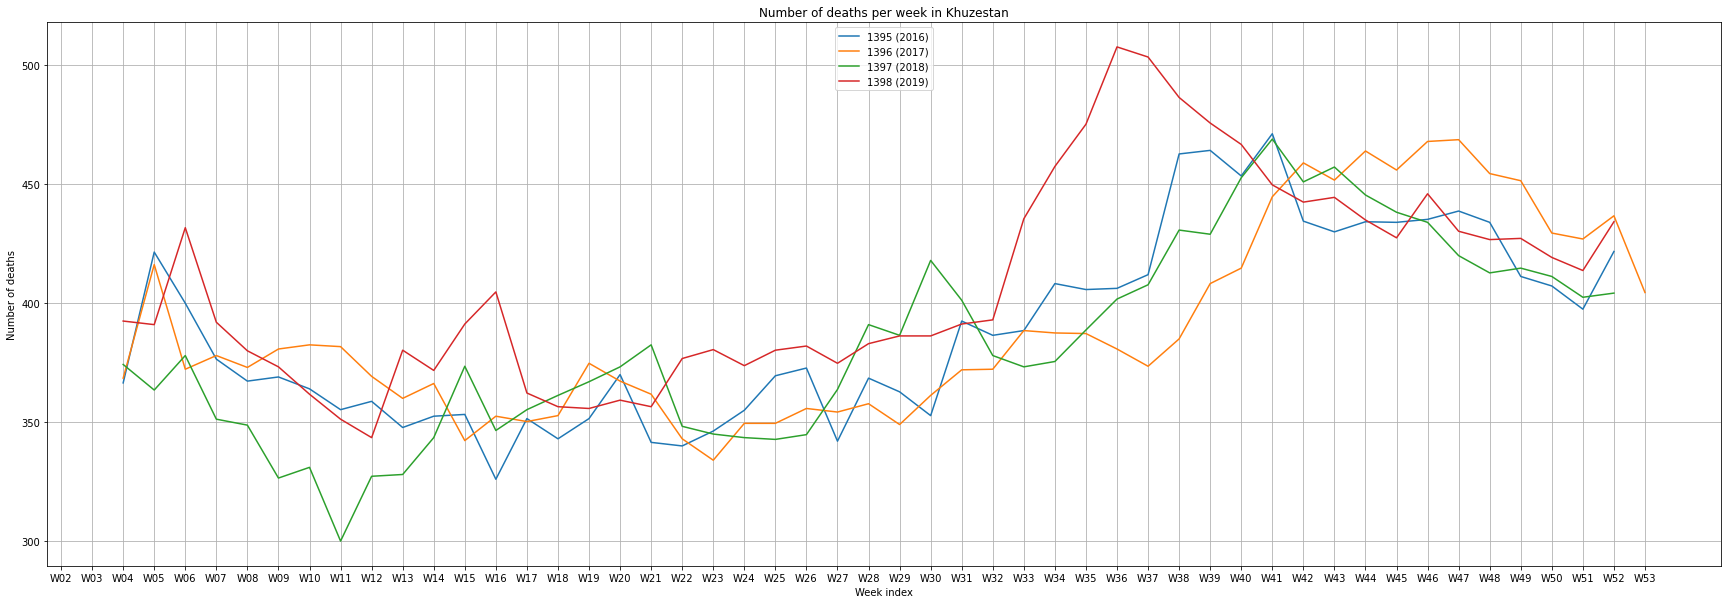

In [ ]:
khuzestan_rolling = province_rolling_mean('خوزستان')
plot_weeks(khuzestan_rolling, [1395, 1396, 1397, 1398],
           title='Number of deaths per week in Khuzestan')

### Qom

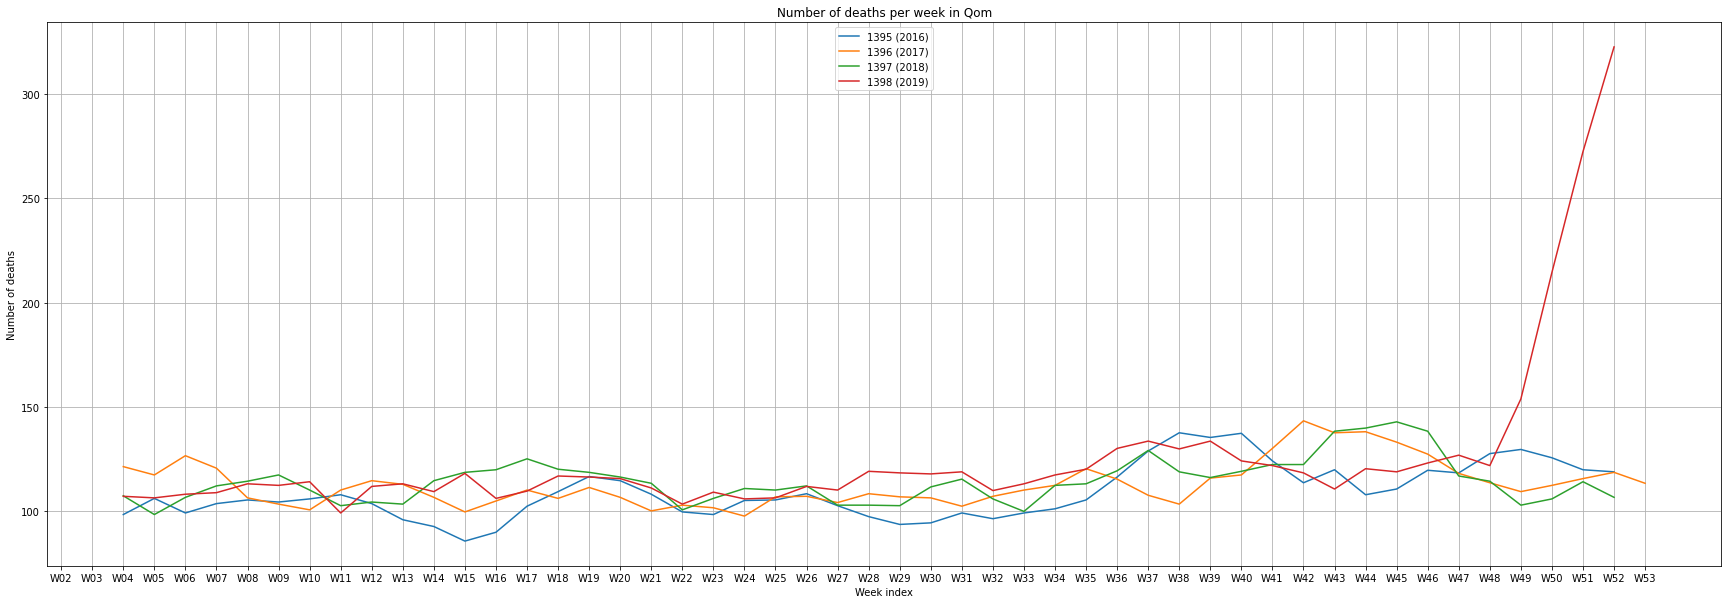

In [ ]:
qom_rolling = province_rolling_mean('قم')
plot_weeks(qom_rolling, [1395, 1396, 1397, 1398],
           title='Number of deaths per week in Qom')

## Age and sex stats

In [ ]:
extended_period = target_weeks.union(pre_target).union(post_target)
extended_period

{'W31',
 'W32',
 'W33',
 'W34',
 'W35',
 'W36',
 'W37',
 'W38',
 'W39',
 'W40',
 'W41',
 'W42'}

In [ ]:
def make_sure_two_digits(age):
  if age == 0:
    return '00'
  if age == '1-4':
    return '01-04'
  if age == '5-9':
    return '05-09'
  return age
target_data = {}
for y in [1395, 1396, 1397, 1398]:
  target_data[y] = data[y][data[y]['week_id'].isin(extended_period)].copy()
  target_data[y].insert(6, 'age_2d', [make_sure_two_digits(a) for a in target_data[y]['age']])
target_data[1398].head()

,year,week,province_code,province,sex,age,age_2d,num_deaths,week_id
13020,1398,D98W41[981007-981013],P0001,آذربايجان شرقي,زن,0,00,6,W41
13021,1398,D98W41[981007-981013],P0001,آذربايجان شرقي,زن,1-4,01-04,7,W41
13022,1398,D98W41[981007-981013],P0001,آذربايجان شرقي,زن,5-9,05-09,4,W41
13023,1398,D98W41[981007-981013],P0001,آذربايجان شرقي,زن,10-14,10-14,1,W41
13024,1398,D98W41[981007-981013],P0001,آذربايجان شرقي,زن,15-19,15-19,1,W41


In [ ]:
agg = {}
age_agg = {}
sex_agg = {}
for y in [1395, 1396, 1397, 1398]:
  agg[y] = target_data[y].groupby(by=['year', 'week', 'week_id', 'sex', 'age_2d'], as_index=False).sum()
  age_agg[y] = target_data[y].groupby(by=['year', 'age_2d'], as_index=False).sum()
  sex_agg[y] = target_data[y].groupby(by=['year', 'sex'], as_index=False).sum()
age_agg[1398].head()

,year,age_2d,num_deaths
0,1398,+95,2347
1,1398,00,2303
2,1398,01-04,1456
3,1398,05-09,821
4,1398,10-14,643


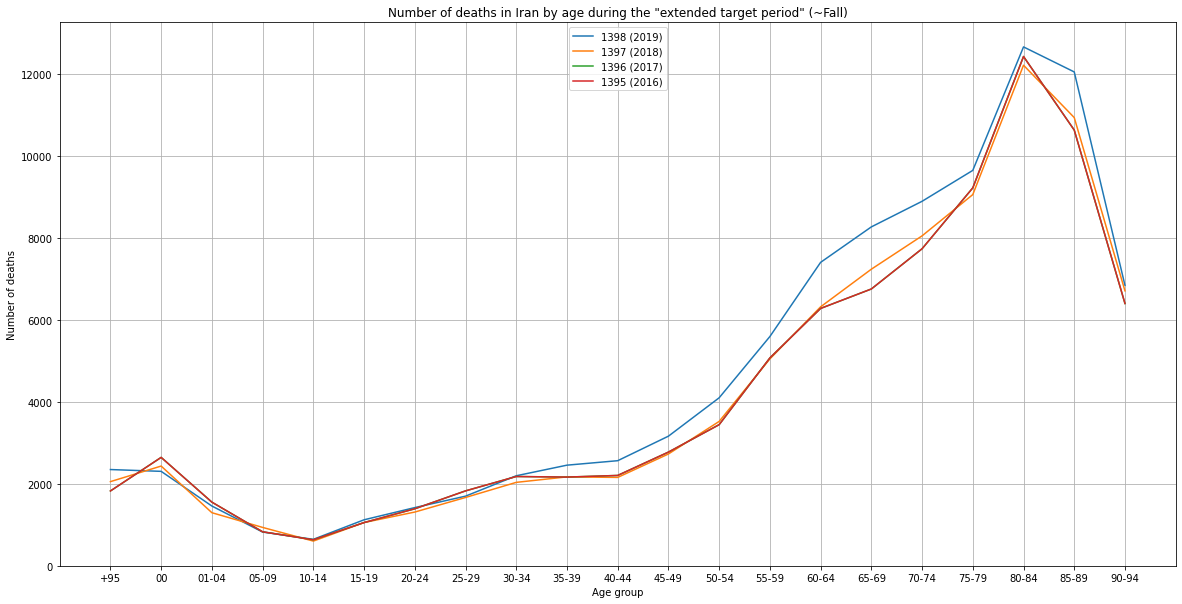

In [ ]:
fig = plt.figure(figsize=[20, 10])
ax = fig.add_subplot()
ax.set_xlabel('Age group')
ax.set_ylabel('Number of deaths')
ax.plot(age_agg[1395]['age_2d'].tolist(), age_agg[1398]['num_deaths'].tolist(), label='1398 (2019)')
ax.plot(age_agg[1396]['age_2d'].tolist(), age_agg[1397]['num_deaths'].tolist(), label='1397 (2018)')
ax.plot(age_agg[1397]['age_2d'].tolist(), age_agg[1396]['num_deaths'].tolist(), label='1396 (2017)')
ax.plot(age_agg[1398]['age_2d'].tolist(), age_agg[1396]['num_deaths'].tolist(), label='1395 (2016)')
plt.legend(loc='upper center')
plt.title('Number of deaths in Iran by age during the "extended target period" (~Fall)')
plt.grid()
plt.show()

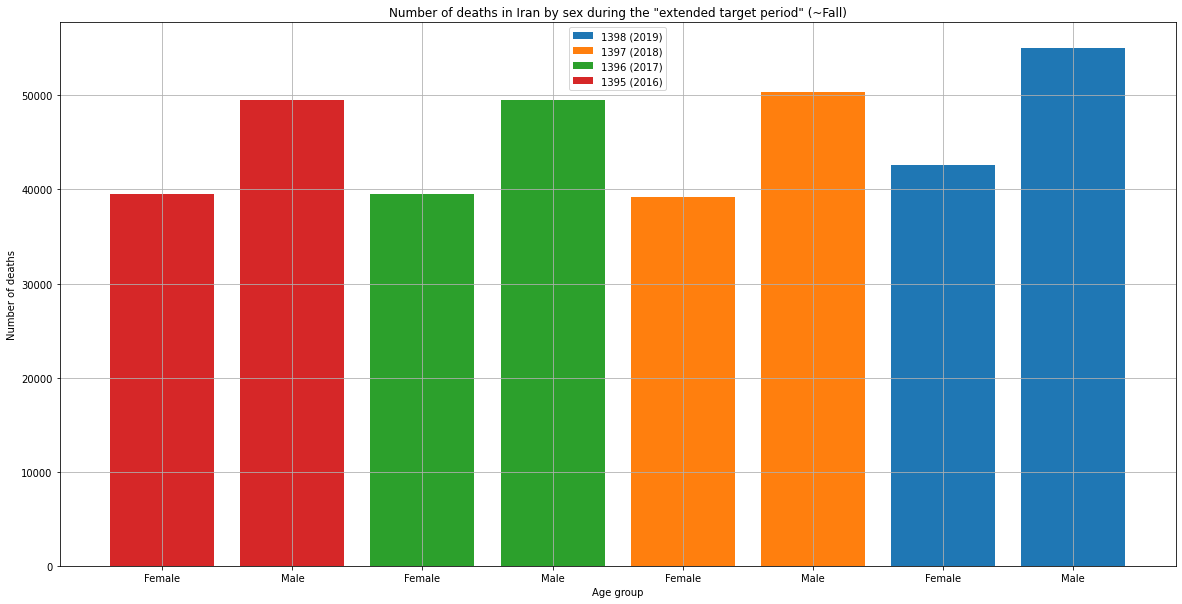

In [ ]:
fig = plt.figure(figsize=[20, 10])
ax = fig.add_subplot()
ax.set_xlabel('Age group')
ax.set_ylabel('Number of deaths')
x_pos = np.arange(2)
ax.bar(x_pos + 6, sex_agg[1398]['num_deaths'].tolist(), label='1398 (2019)')
ax.bar(x_pos + 4, sex_agg[1397]['num_deaths'].tolist(), label='1397 (2018)')
ax.bar(x_pos + 2, sex_agg[1396]['num_deaths'].tolist(), label='1396 (2017)')
ax.bar(x_pos, sex_agg[1396]['num_deaths'].tolist(), label='1395 (2016)')
plt.xticks(
    np.concatenate((x_pos, x_pos + 2, x_pos + 4, x_pos + 6)),
    ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'])
plt.legend(loc='upper center')
plt.title('Number of deaths in Iran by sex during the "extended target period" (~Fall)')
plt.grid()
plt.show()

In [ ]:
for y in [1395, 1396, 1397, 1398]:
  print(sex_agg[y]['num_deaths'].tolist())

[40435, 51005]
[39525, 49522]
[39156, 50380]
[42647, 55020]


# The COVID-19 impact
This is a brief look at the impact of COVID-19 in 1399 (2020). COVID is not our focus here so we do not get into detailed analysis of this data. But it is a
confirmation that the number of deaths caused by COVID-19 is much higher than
government official figures (as reported [before](https://www.medrxiv.org/content/10.1101/2020.04.18.20070904v2)).
COVID is also the reason that we cannot include 1399 data in our comparison.

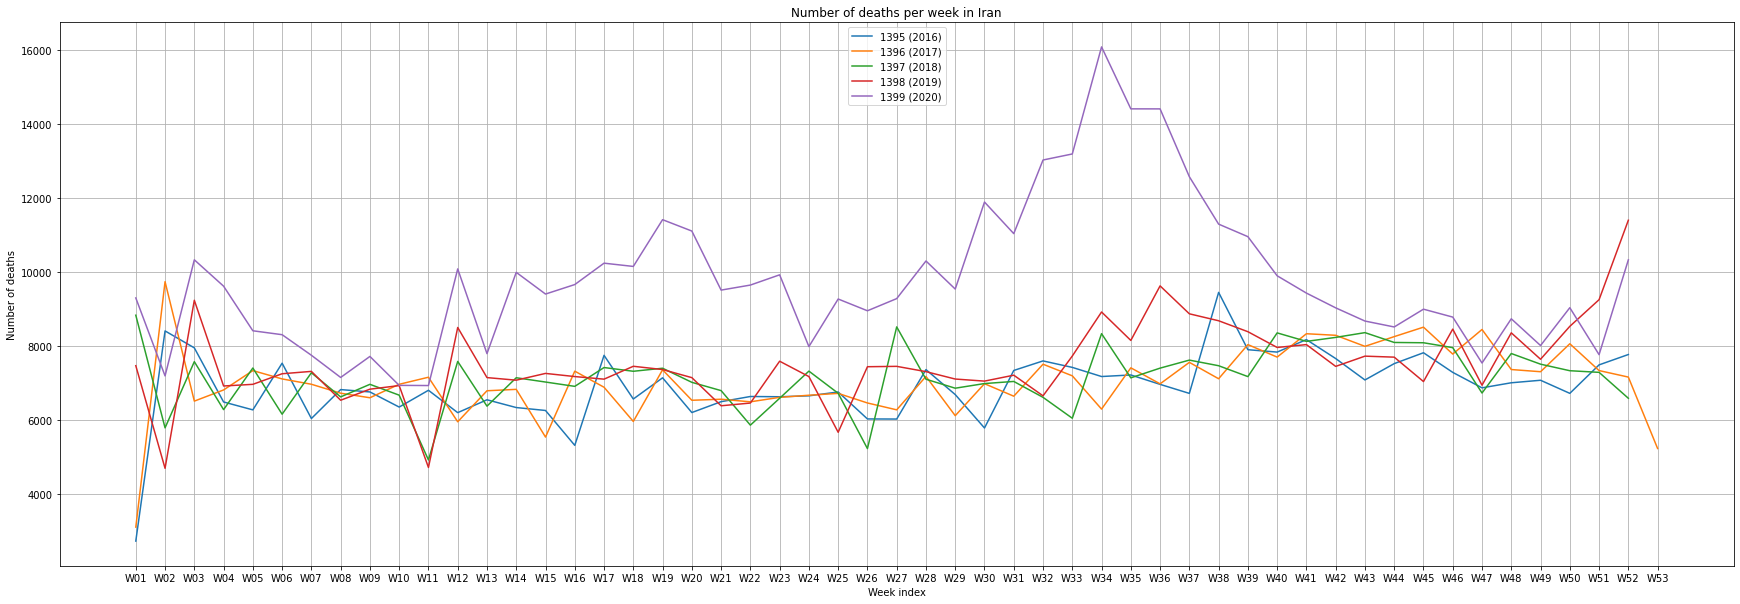

In [ ]:
plot_weeks(week_agg, [1395, 1396, 1397, 1398, 1399])

# Cause of death stats in Tehran province

At least for some provinces, data on causes of death is publicly available. One example for which I found some data is Tehran, from [here for 1397](https://www.sabteahval.ir/tehran/Default.aspx?tabID=30447) and [here for 1398](https://www.sabteahval.ir/tehran/default.aspx?tabid=32025) (which misses the last month of 1398). I found these by crawling the whole [sabteahval.ir](https://www.sabteahval.ir/) website with `wget` so I am not sure how exactly they are linked from the root (in particular for 1397). I also could not find similar data for years prior to 1397.

The following cell shows a snapshot of one of the original PDF files from which the CSV files are generated. The conversion process involved using `wget`, `pdftotext`, `awk`, etc. with some manual steps; so there might be some errors.
The CSV files are also available in [the same Drive folder](https://drive.google.com/drive/folders/1ZNEHADgJ-qIK0PqWZD9icC_yv3ST3GPk?usp=sharing).

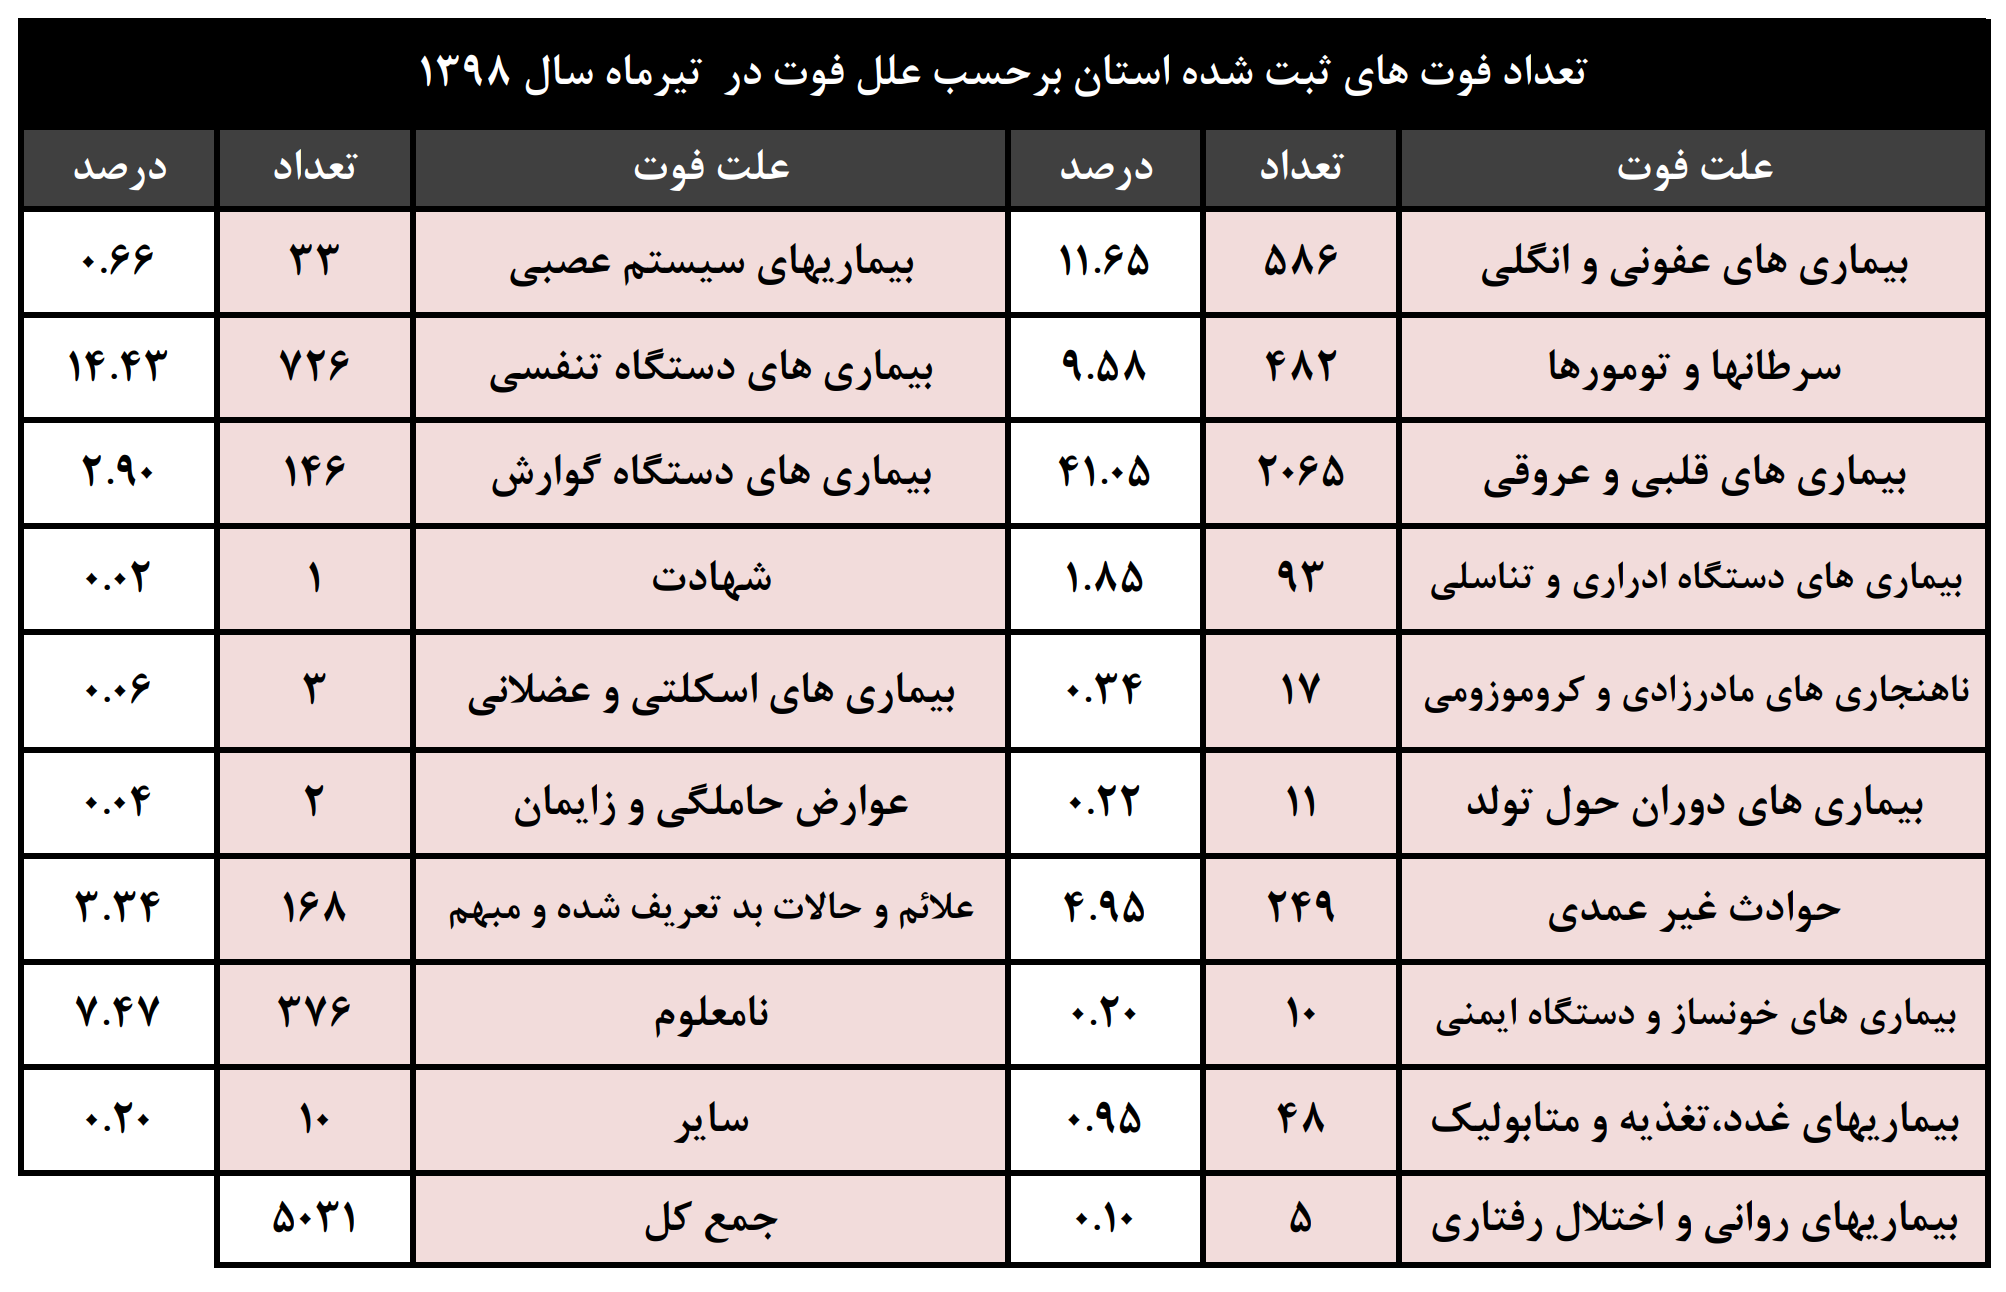

In [35]:
csv_upload = files.upload()

for fn in csv_upload.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(csv_upload[fn])))

Saving death_cause_12_1397_filtered.csv to death_cause_12_1397_filtered.csv
Saving death_cause_11_1398_filtered.csv to death_cause_11_1398_filtered.csv
Saving death_cause_11_1397_filtered.csv to death_cause_11_1397_filtered.csv
Saving death_cause_10_1398_filtered.csv to death_cause_10_1398_filtered.csv
Saving death_cause_10_1397_filtered.csv to death_cause_10_1397_filtered.csv
Saving death_cause_09_1398_filtered.csv to death_cause_09_1398_filtered.csv
Saving death_cause_09_1397_filtered.csv to death_cause_09_1397_filtered.csv
Saving death_cause_08_1398_filtered.csv to death_cause_08_1398_filtered.csv
Saving death_cause_08_1397_filtered.csv to death_cause_08_1397_filtered.csv
Saving death_cause_07_1398_filtered.csv to death_cause_07_1398_filtered.csv
Saving death_cause_07_1397_filtered.csv to death_cause_07_1397_filtered.csv
Saving death_cause_06_1398_filtered.csv to death_cause_06_1398_filtered.csv
Saving death_cause_06_1397_filtered.csv to death_cause_06_1397_filtered.csv
Saving death

In [36]:
csv_files = {}
for fn in csv_upload.keys():
  csv_files[fn] = io.BytesIO(csv_upload.get(fn))
csv_files.keys()

dict_keys(['death_cause_12_1397_filtered.csv', 'death_cause_11_1398_filtered.csv', 'death_cause_11_1397_filtered.csv', 'death_cause_10_1398_filtered.csv', 'death_cause_10_1397_filtered.csv', 'death_cause_09_1398_filtered.csv', 'death_cause_09_1397_filtered.csv', 'death_cause_08_1398_filtered.csv', 'death_cause_08_1397_filtered.csv', 'death_cause_07_1398_filtered.csv', 'death_cause_07_1397_filtered.csv', 'death_cause_06_1398_filtered.csv', 'death_cause_06_1397_filtered.csv', 'death_cause_05_1398_filtered.csv', 'death_cause_05_1397_filtered.csv', 'death_cause_04_1398_filtered.csv', 'death_cause_04_1397_filtered.csv', 'death_cause_03_1398_filtered.csv', 'death_cause_03_1397_filtered.csv', 'death_cause_02_1398_filtered.csv', 'death_cause_02_1397_filtered.csv', 'death_cause_01_1398_filtered.csv', 'death_cause_01_1397_filtered.csv'])

In [37]:
death_cause = {}
for fn in csv_files:
  death_cause[fn.replace('death_cause_', '').replace('_filtered.csv', '')] = pd.read_csv(csv_files[fn])
death_cause['04_1397'].head()

,علت فوت,تعداد
0,اسكلتي و عضالني,4
1,سيستمعصبي,39
2,خونساز و دستگاه ایمني,10
3,غددتغذیهومتابوليك,36
4,دستگاه ها ادراری و تناسلي,119


In [38]:
merged_1397 = pd.DataFrame(death_cause['01_1397'])
rename_map = {'علت فوت': 'cause', 'تعداد': 1}

for month in range(11):
  m_key = str(month+2).zfill(2) + '_1397'
  merged_1397 = pd.merge(merged_1397, death_cause[m_key], on=['علت فوت'],
                         how='outer', suffixes=['', month+2])
  rename_map['تعداد{}'.format(month+2)] = month+2
merged_1397 = merged_1397.rename(columns=rename_map)
merged_1397

,cause,1,2,3,4,5,6,7,8,9,10,11,12
0,اسكلتي و عضالني,1.0,4.0,4.0,4.0,3.0,2.0,1.0,5.0,5.0,2.0,3.0,6.0
1,سيستمعصبي,48.0,58.0,58.0,39.0,25.0,36.0,34.0,43.0,35.0,42.0,46.0,34.0
2,خونساز و دستگاه ایمني,16.0,8.0,14.0,10.0,5.0,16.0,14.0,10.0,7.0,6.0,10.0,13.0
3,غددتغذیهومتابوليك,32.0,39.0,39.0,36.0,43.0,33.0,42.0,44.0,33.0,47.0,47.0,35.0
4,دستگاه ها ادراری و تناسلي,115.0,116.0,124.0,119.0,111.0,106.0,120.0,111.0,97.0,125.0,116.0,103.0
5,حوادث غير عمدی,203.0,203.0,209.0,233.0,208.0,227.0,231.0,205.0,201.0,204.0,213.0,161.0
6,دستگاهتنفسي,631.0,795.0,647.0,704.0,678.0,565.0,674.0,640.0,741.0,961.0,949.0,717.0
7,سرطانها و تومورها,387.0,441.0,441.0,479.0,504.0,427.0,547.0,435.0,415.0,441.0,456.0,423.0
8,گوارش,106.0,144.0,144.0,153.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,عالئم و حالت های بد تعریف شده و,131.0,149.0,119.0,156.0,164.0,143.0,157.0,164.0,148.0,167.0,150.0,132.0


In [39]:
merged_1398 = pd.DataFrame(death_cause['01_1398'])
rename_map = {'علت فوت': 'cause', 'تعداد': 1}
for month in range(10):
  m_key = str(month+2).zfill(2) + '_1398'
  merged_1398 = pd.merge(merged_1398, death_cause[m_key], on=['علت فوت'],
                    how='outer', suffixes=['', month+2])
  rename_map['تعداد{}'.format(month+2)] = month+2
merged_1398 = merged_1398.rename(columns=rename_map)
merged_1398

,cause,1,2,3,4,5,6,7,8,9,10,11
0,بيماري هاي عفوني و انگلي,478,532,510,586,515,529,612,560,617,552,556
1,بيماريهاي سيستم عصبي,42,31,38,33,43,41,33,36,46,46,42
2,سرطانها و تومورها,436,500,388,482,411,406,436,532,415,451,464
3,بيماري هاي دستگاه تنفسي,645,763,707,726,673,655,753,853,1011,930,853
4,بيماري هاي قلبي و عروقي,1946,2118,2007,2065,1925,1917,2072,2298,2382,2226,2348
5,بيماري هاي دستگاه گوارش,113,129,141,146,116,135,139,145,156,134,141
6,بيماري هاي دستگاه ادراري و تناسلي,109,98,119,93,105,87,98,126,101,106,107
7,شهادت,2,0,0,1,2,0,1,2,1,72,25
8,ناهنجاري هاي مادرزادي و کروموزومي,10,10,12,17,13,10,9,10,19,16,15
9,بيماري هاي اسکلتي و عضالني,3,7,2,3,0,2,1,3,1,4,2


In [40]:
merged_1397[merged_1397['cause']=='جمع کل'].iloc[0,1:].tolist()

[4342.0,
 4924.0,
 4593.0,
 5068.0,
 4743.0,
 4351.0,
 4895.0,
 4667.0,
 4610.0,
 5574.0,
 5479.0,
 4648.0]

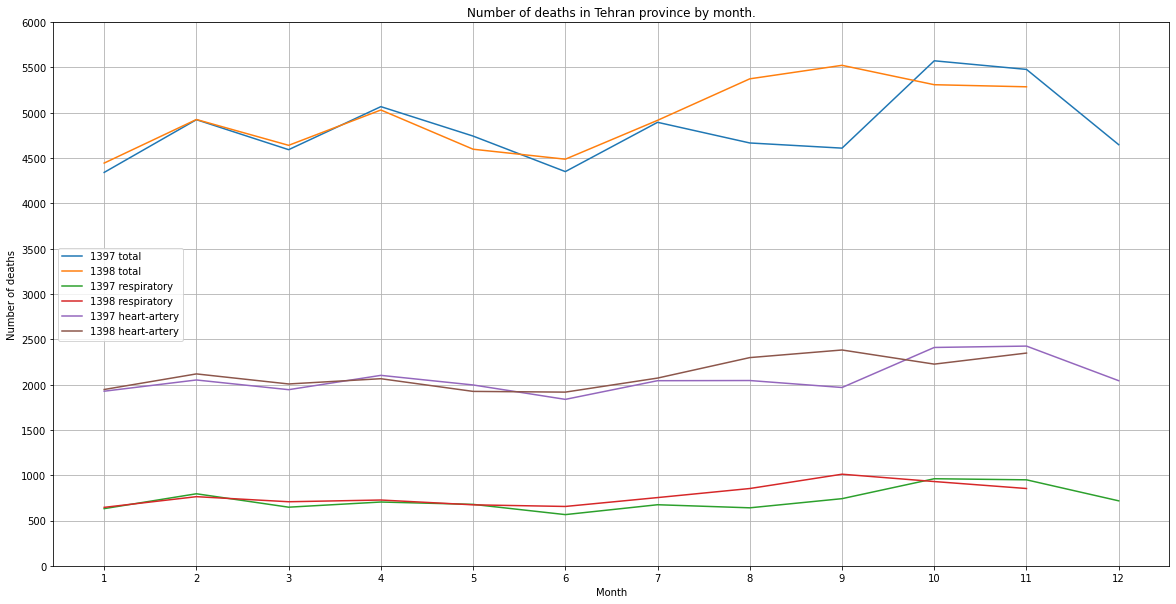

In [41]:
fig = plt.figure(figsize=[20, 10])
ax = fig.add_subplot()
ax.set_xlabel('Month')
ax.set_ylabel('Number of deaths')
ax.plot(merged_1397.columns[1:].tolist(),
        merged_1397[merged_1397['cause']=='جمع کل'].iloc[0,1:].tolist(),
        label='1397 total')
ax.plot(merged_1398.columns[1:].tolist(),
        merged_1398[merged_1398['cause']=='جمع کل'].iloc[0,1:].tolist(),
        label='1398 total')
ax.plot(merged_1397.columns[1:].tolist(),
        merged_1397[merged_1397['cause']=='دستگاهتنفسي'].iloc[0,1:].tolist(),
        label='1397 respiratory')
ax.plot(merged_1398.columns[1:].tolist(),
        merged_1398[merged_1398['cause']=='بيماري هاي دستگاه تنفسي'].iloc[0,1:].tolist(),
        label='1398 respiratory')
ax.plot(merged_1397.columns[1:].tolist(),
        merged_1397[merged_1397['cause']=='قلبي و عروقي'].iloc[0,1:].tolist(),
        label='1397 heart-artery')
ax.plot(merged_1398.columns[1:].tolist(),
        merged_1398[merged_1398['cause']=='بيماري هاي قلبي و عروقي'].iloc[0,1:].tolist(),
        label='1398 heart-artery')
ax.set_xticks(range(1, 13, 1))
ax.set_yticks(range(0, 6001, 500))
plt.legend(loc='center left')
plt.title('Number of deaths in Tehran province by month.')
plt.grid()
plt.show()

In [42]:
merged_1397_t = merged_1397.transpose()
merged_1397_t.columns = merged_1397_t.iloc[0,:].tolist()
merged_1397_t.drop(index='cause', inplace=True)
merged_1398_t = merged_1398.transpose()
merged_1398_t.columns = merged_1398_t.iloc[0,:].tolist()
merged_1398_t.drop(index='cause', inplace=True)
merged_1398_t.head()

,بيماري هاي عفوني و انگلي,بيماريهاي سيستم عصبي,سرطانها و تومورها,بيماري هاي دستگاه تنفسي,بيماري هاي قلبي و عروقي,بيماري هاي دستگاه گوارش,بيماري هاي دستگاه ادراري و تناسلي,شهادت,ناهنجاري هاي مادرزادي و کروموزومي,بيماري هاي اسکلتي و عضالني,بيماري هاي دوران حول تولد,عوارض حاملگي و زايمان,حوادث غير عمدي,عالئم و حاالت بد تعريف شده و مبهم,بيماري هاي خونساز و دستگاه ايمني,نامعلوم,بيماريهاي غدد،تغذيه و متابوليک,ساير,بيماريهاي رواني و اختالل رفتاري,جمع کل
1,478,42,436,645,1946,113,109,2,10,3,4,0,181,133,9,296,33,4,1,4445
2,532,31,500,763,2118,129,98,0,10,7,13,0,198,121,14,359,26,5,2,4926
3,510,38,388,707,2007,141,119,0,12,2,11,0,216,129,13,312,32,3,1,4641
4,586,33,482,726,2065,146,93,1,17,3,11,2,249,168,10,376,48,10,5,5031
5,515,43,411,673,1925,116,105,2,13,0,9,0,250,128,13,343,38,9,5,4598


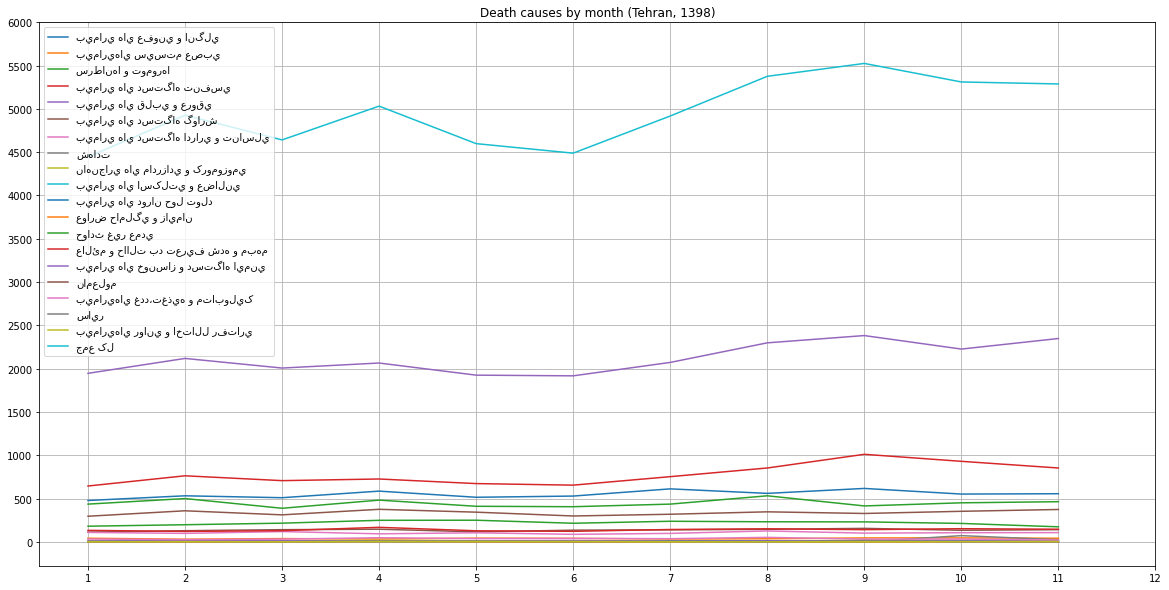

In [43]:
merged_1398_t.plot(subplots=False, figsize=[20, 10], grid=True,
                   xticks=range(1, 13, 1), yticks=range(0, 6001, 500),
                   title='Death causes by month (Tehran, 1398)')

The cause of death analysis here is inconclusive. I was wondering maybe the 
excess death might be due to some special disease or condition. In particular
I was wondering if there was a wave of respiratory illness earlier than
usual, but it seems the hump is across the board. Also see
[this report](https://www.bbc.com/persian/iran-50883893) where the official
number of total flu deaths is reported 106 for the entire Fall 1398 (2019).
Obviously official numbers might be an underestimate as we saw during COVID-19. 

## Comparison with weekly stats
This is mostly for cross-validating the data from the two sources.

In [44]:
merged_1398[merged_1398['cause'] == 'جمع کل']

,cause,1,2,3,4,5,6,7,8,9,10,11
19,جمع کل,4445,4926,4641,5031,4598,4488,4917,5375,5524,5310,5287


In [45]:
merged_1398.iloc[19, 1:12].sum()

54542

In [47]:
sum_cause_1398 = merged_1398[merged_1398['cause'] == 'جمع کل'].sum(axis=1)
sum_cause_1398

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


19    54542
dtype: int64

In [48]:
# We need to drop the last 4 weeks because monthly data has the first 11 months.
week_agg[1398].tail(5)

,year,week,week_id,num_deaths
47,1398,D98W48[981126-981202],W48,8355
48,1398,D98W49[981203-981209],W49,7641
49,1398,D98W50[981210-981216],W50,8531
50,1398,D98W51[981217-981223],W51,9252
51,1398,D98W52[981224-990101],W52,11400


In [49]:
filtered_data_1398 = data[1398][(data[1398]['province'] == 'تهران') & (data[1398]['week_id'] < 'W49')]
filtered_data_1398.sort_values(by=['week_id'], ascending=False)

,year,week,province_code,province,sex,age,num_deaths,week_id
12032,1398,D98W48[981126-981202],P0008,تهران,زن,+95,18,W48
12033,1398,D98W48[981126-981202],P0008,تهران,مرد,0,14,W48
12035,1398,D98W48[981126-981202],P0008,تهران,مرد,5-9,3,W48
12036,1398,D98W48[981126-981202],P0008,تهران,مرد,10-14,2,W48
12037,1398,D98W48[981126-981202],P0008,تهران,مرد,15-19,3,W48
...,...,...,...,...,...,...,...,...
61514,1398,D98W01[980103-980109],P0008,تهران,مرد,20-24,7,W01
61513,1398,D98W01[980103-980109],P0008,تهران,مرد,15-19,8,W01
61512,1398,D98W01[980103-980109],P0008,تهران,مرد,10-14,0,W01
61511,1398,D98W01[980103-980109],P0008,تهران,مرد,5-9,2,W01


In [50]:
filtered_data_1398['num_deaths'].sum()

54496

# Canada
In this section we look at weekly mortality rate in Canada as a reference point.
This is to see if trends similar to Iran's data can be seen in Canada.
In particular, we compare the seasonal mortality rate changes in different years.

The source of the data is StatCan; in particular,
[weekly death counts, by age group and sex](https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=1310076801). Data on causes of death is
also available [here](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1310081001&cubeTimeFrame.startDaily=2015-02-01&cubeTimeFrame.endDaily=2021-10-02&referencePeriods=20150201%2C20211002) but is not analyzed here yet.

Note all data items are divisible by 5 which I believe is because StatCan does a random rounding to the nearest multiple of 5 for confidentiality (e.g., see [here](https://www23.statcan.gc.ca/imdb/p2SV.pl?Function=getSurvey&SDDS=3207))

Again, the CSV data files are available in the same Drive directory, under
the [Canada sub-dir](https://drive.google.com/drive/folders/1SIHxetQuooTaa4l3GU9zUYkIiKMPVzBC?usp=sharing).

In [52]:
ca_uploaded = files.upload()

for fn in ca_uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(ca_uploaded[fn])))

Saving 1310081001_databaseLoadingData-weekly_death_cause.csv to 1310081001_databaseLoadingData-weekly_death_cause.csv
Saving 1310076801_databaseLoadingData-weekly_death.csv to 1310076801_databaseLoadingData-weekly_death.csv
User uploaded file "1310081001_databaseLoadingData-weekly_death_cause.csv" with length 6829194 bytes
User uploaded file "1310076801_databaseLoadingData-weekly_death.csv" with length 3692643 bytes


In [53]:
ca_file = io.BytesIO(ca_uploaded.get('1310076801_databaseLoadingData-weekly_death.csv'))

In [54]:
ca_data = pd.read_csv(ca_file)
ca_data.head()

,REF_DATE,GEO,DGUID,Age at time of death,Sex,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2015-03-14,"Newfoundland and Labrador, place of occurrence",2016A000210,"Age at time of death, 0 to 44 years",Both sexes,Number of deaths,Number,223,units,0,v1161320339,2.2.1.1,5.0,NaN,NaN,NaN,0
1,2015-03-21,"Newfoundland and Labrador, place of occurrence",2016A000210,"Age at time of death, 0 to 44 years",Both sexes,Number of deaths,Number,223,units,0,v1161320339,2.2.1.1,5.0,NaN,NaN,NaN,0
2,2015-03-28,"Newfoundland and Labrador, place of occurrence",2016A000210,"Age at time of death, 0 to 44 years",Both sexes,Number of deaths,Number,223,units,0,v1161320339,2.2.1.1,5.0,NaN,NaN,NaN,0
3,2015-04-04,"Newfoundland and Labrador, place of occurrence",2016A000210,"Age at time of death, 0 to 44 years",Both sexes,Number of deaths,Number,223,units,0,v1161320339,2.2.1.1,10.0,NaN,NaN,NaN,0
4,2015-04-11,"Newfoundland and Labrador, place of occurrence",2016A000210,"Age at time of death, 0 to 44 years",Both sexes,Number of deaths,Number,223,units,0,v1161320339,2.2.1.1,5.0,NaN,NaN,NaN,0


In [55]:
col_rename_map = {
   'Age at time of death': 'age' 
}
ca_data = ca_data.rename(columns=col_rename_map).drop(
    columns=['DGUID', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR',
             'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'])
ca_data.head()

,REF_DATE,GEO,age,Sex,Characteristics,VALUE
0,2015-03-14,"Newfoundland and Labrador, place of occurrence","Age at time of death, 0 to 44 years",Both sexes,Number of deaths,5.0
1,2015-03-21,"Newfoundland and Labrador, place of occurrence","Age at time of death, 0 to 44 years",Both sexes,Number of deaths,5.0
2,2015-03-28,"Newfoundland and Labrador, place of occurrence","Age at time of death, 0 to 44 years",Both sexes,Number of deaths,5.0
3,2015-04-04,"Newfoundland and Labrador, place of occurrence","Age at time of death, 0 to 44 years",Both sexes,Number of deaths,10.0
4,2015-04-11,"Newfoundland and Labrador, place of occurrence","Age at time of death, 0 to 44 years",Both sexes,Number of deaths,5.0


In [56]:
ca_data_agg = ca_data.groupby(by=['REF_DATE', 'GEO', 'age'], as_index=False).sum()
ca_data_agg.head(20)

,REF_DATE,GEO,age,VALUE
0,2015-03-14,"Alberta, place of occurrence","Age at time of death, 0 to 44 years",40.0
1,2015-03-14,"Alberta, place of occurrence","Age at time of death, 45 to 64 years",80.0
2,2015-03-14,"Alberta, place of occurrence","Age at time of death, 65 to 84 years",215.0
3,2015-03-14,"Alberta, place of occurrence","Age at time of death, 85 years and over",145.0
4,2015-03-14,"British Columbia, place of occurrence","Age at time of death, 0 to 44 years",30.0
5,2015-03-14,"British Columbia, place of occurrence","Age at time of death, 45 to 64 years",105.0
6,2015-03-14,"British Columbia, place of occurrence","Age at time of death, 65 to 84 years",270.0
7,2015-03-14,"British Columbia, place of occurrence","Age at time of death, 85 years and over",290.0
8,2015-03-14,"Manitoba, place of occurrence","Age at time of death, 0 to 44 years",10.0
9,2015-03-14,"Manitoba, place of occurrence","Age at time of death, 45 to 64 years",25.0


In [57]:
ca_data_agg.drop(columns=['age']).groupby(
    by=['REF_DATE', 'GEO'], as_index=False).sum().head(15)

,REF_DATE,GEO,VALUE
0,2015-03-14,"Alberta, place of occurrence",480.0
1,2015-03-14,"British Columbia, place of occurrence",695.0
2,2015-03-14,"Manitoba, place of occurrence",190.0
3,2015-03-14,"New Brunswick, place of occurrence",165.0
4,2015-03-14,"Newfoundland and Labrador, place of occurrence",100.0
5,2015-03-14,"Northwest Territories, place of occurrence",5.0
6,2015-03-14,"Nova Scotia, place of occurrence",215.0
7,2015-03-14,"Nunavut, place of occurrence",0.0
8,2015-03-14,"Ontario, place of occurrence",1995.0
9,2015-03-14,"Prince Edward Island, place of occurrence",25.0


## Converting to Iranian calendar weeks

In [58]:
ca_totals = ca_data_agg.drop(columns=['age']).groupby(
    by=['REF_DATE'], as_index=False).sum().sort_values(
        by=['REF_DATE'], ascending=True)
ca_totals.drop(index=0, inplace=True)
ca_totals.head()

,REF_DATE,VALUE
1,2015-03-21,5330.0
2,2015-03-28,5255.0
3,2015-04-04,5260.0
4,2015-04-11,5055.0
5,2015-04-18,5265.0


In [59]:
# 20th of March is close to the first day of the Iranian new year.
ca_totals[ca_totals['REF_DATE'].str.contains('-03-2')]

,REF_DATE,VALUE
1,2015-03-21,5330.0
2,2015-03-28,5255.0
54,2016-03-26,5480.0
106,2017-03-25,5560.0
158,2018-03-24,5600.0
210,2019-03-23,5620.0
262,2020-03-21,5870.0
263,2020-03-28,5960.0
314,2021-03-20,5410.0
315,2021-03-27,5545.0


In [60]:
# These are the first weeks for Iran's data:
# D95W01[941229-950106]
# D96W01[951228-960104]
# D97W01[970104-970110]
# D98W01[980103-980109]
# D99W01[990102-990108]
first_weeks = ['2021-03-20', '2020-03-21', '2019-03-23', '2018-03-24',
               '2017-03-18', '2016-03-19', '2015-03-21' ]
weeks = []
years = []
for index, row in ca_totals.iterrows():
  ca_week = row['REF_DATE']
  cawd = datetime.strptime(ca_week, "%Y-%m-%d")
  ir_week = None
  for fw in first_weeks:
    if ca_week >= fw:
      fwd = datetime.strptime(fw, "%Y-%m-%d")
      ir_week = (cawd - fwd).days / 7
      ca_year = int(fw[:4])
      ir_year = ca_year - 621
      break
  if ir_week == None or round(ir_week) != ir_week:
    print(ca_week, ' ', ir_week)
    raise ValueError()
  weeks.append('W{}'.format(round(ir_week)))
  years.append('{}'.format(ir_year))
ca_totals['ir_year'] = years
ca_totals['ir_week'] = weeks
ca_totals.head()

,REF_DATE,VALUE,ir_year,ir_week
1,2015-03-21,5330.0,1394,W0
2,2015-03-28,5255.0,1394,W1
3,2015-04-04,5260.0,1394,W2
4,2015-04-11,5055.0,1394,W3
5,2015-04-18,5265.0,1394,W4


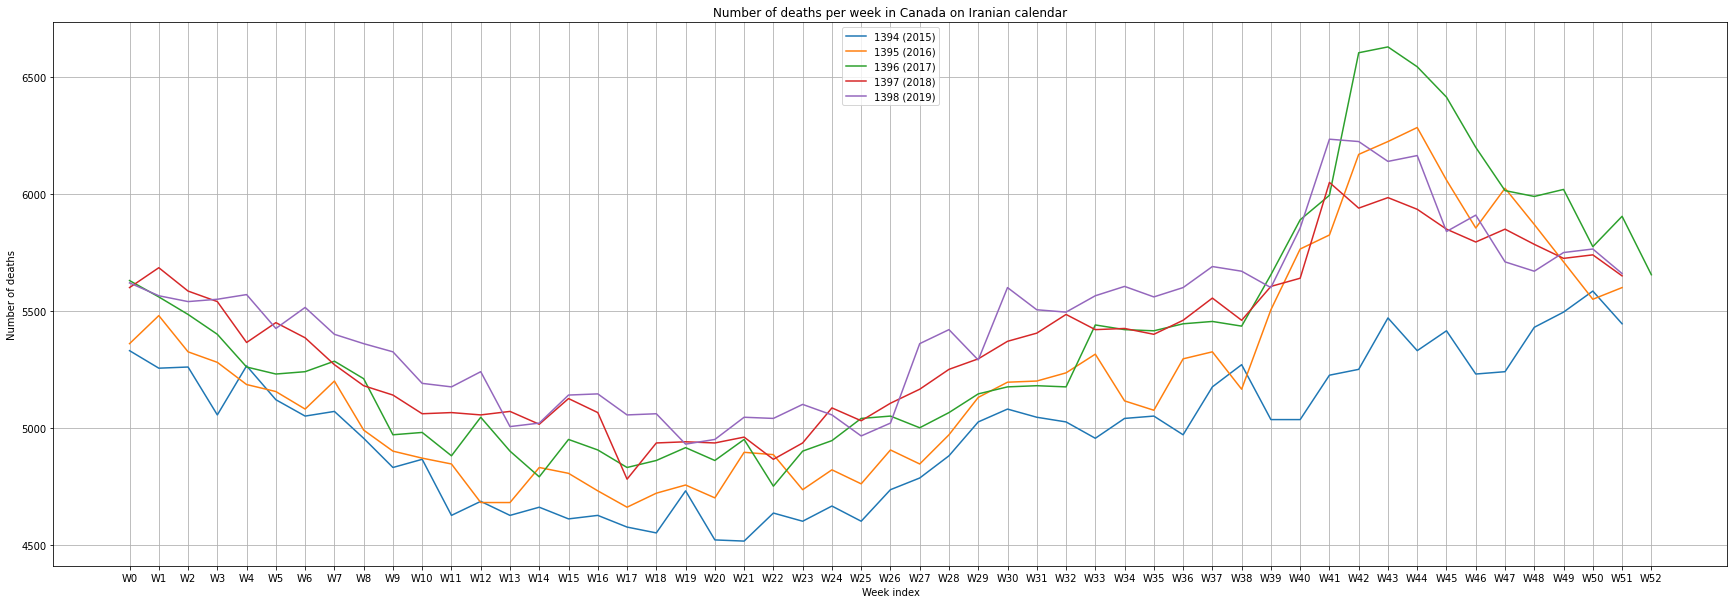

In [61]:
%matplotlib inline
def plot_weeks_ca(week_agg, years):
  fig = plt.figure(figsize=[30, 10])
  ax = fig.add_subplot()
  ax.set_xlabel('Week index')
  ax.set_ylabel('Number of deaths')
  for y in years:
    y_weeks = week_agg[week_agg['ir_year'] == y]
    ax.plot(y_weeks['ir_week'].tolist(), y_weeks['VALUE'].tolist(),
            label='{} ({})'.format(y, int(y) + 621))
  plt.legend(loc='upper center')
  plt.title('Number of deaths per week in Canada on Iranian calendar')
  plt.grid()
  plt.show()
plot_weeks_ca(ca_totals, ['1394', '1395', '1396', '1397', '1398'])

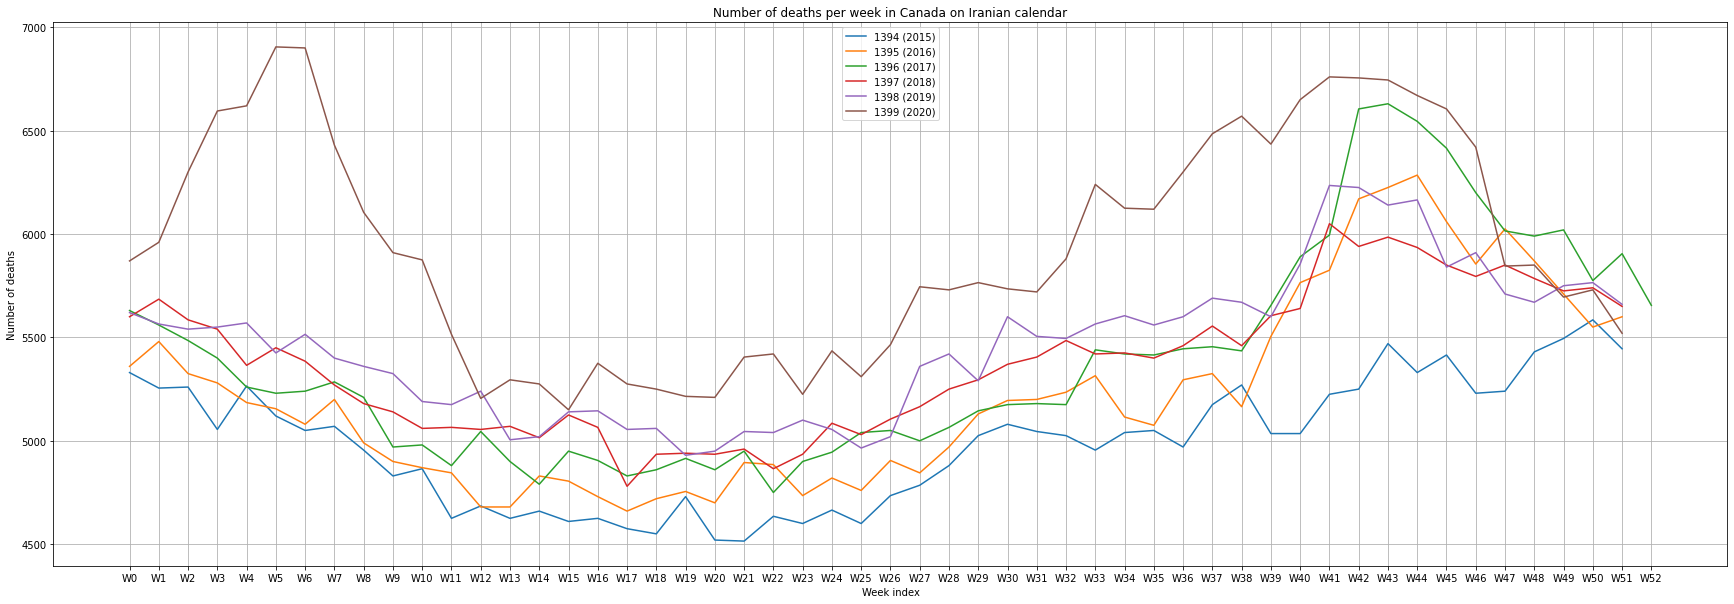

In [62]:
plot_weeks_ca(ca_totals, ['1394', '1395', '1396', '1397', '1398', '1399'])